# Notebook LDA
## Autor: Andrés Rosso

Este script se utiliza para conectar a una base de datos SQLite, cargar una tabla en un DataFrame de Pandas, y crear una nueva columna concatenando otras columnas seleccionadas.

## Funciones

### `connect_to_db(db_path)`
Establece una conexión a la base de datos SQLite.

- **Parámetros:**
  - `db_path` (str): Ruta al archivo de la base de datos SQLite.

- **Retorna:**
  - `conn` (sqlite3.Connection): Objeto de conexión a la base de datos.

### `load_table_to_dataframe(conn, table_name)`
Carga una tabla desde la base de datos SQLite en un DataFrame de Pandas.

- **Parámetros:**
  - `conn` (sqlite3.Connection): Objeto de conexión a la base de datos.
  - `table_name` (str): Nombre de la tabla que se desea cargar.

- **Retorna:**
  - `df` (pandas.DataFrame): DataFrame que contiene los datos de la tabla seleccionada.

### `create_text_column(df)`
Crea una nueva columna llamada 'TEXT' en el DataFrame, concatenando las columnas `title`, `meta_description`, `description`, y `body`.

- **Parámetros:**
  - `df` (pandas.DataFrame): DataFrame que contiene las columnas a concatenar.

- **Retorna:**
  - `df` (pandas.DataFrame): DataFrame con la nueva columna 'TEXT'.

## Ejecución del Script

1. **Ruta de la base de datos:** 
   - Especifica la ruta de la base de datos SQLite en la variable `db_path`.

2. **Conexión a la base de datos:**
   - Se conecta a la base de datos utilizando la función `connect_to_db`.

3. **Carga de la tabla:**
   - La tabla especificada en `table_name` se carga en un DataFrame mediante la función `load_table_to_dataframe`.

4. **Creación de la columna 'TEXT':**
   - Se crea una nueva columna llamada 'TEXT' que concatena las columnas `title`, `meta_description`, `description`, y `body` usando la función `create_text_column`.

5. **Cierre de la conexión:**
   - Se cierra la conexión a la base de datos.

6. **Visualización del DataFrame resultante:**
   - Se imprimen las columnas del DataFrame y las primeras filas para inspección.

## Notas

- La columna 'TEXT' es útil para análisis de texto o procesamiento de lenguaje natural (NLP).
- La función `fillna('')` se usa para reemplazar valores nulos con cadenas vacías antes de concatenar, asegurando que la columna 'TEXT' no contenga valores nulos.


In [5]:
import sqlite3
import pandas as pd

def connect_to_db(db_path):
    """Establish a connection to the SQLite database."""
    conn = sqlite3.connect(db_path)
    return conn

def load_table_to_dataframe(conn, table_name):
    """Load a table from the SQLite database into a Pandas DataFrame."""
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, conn)
    return df

def create_text_column(df):
    """Create a new column 'TEXT' by concatenating specific columns."""
    df['TEXT'] = df['title'] + ' ' + df['meta_description'] + ' ' + df['description'] + ' ' + df['body']
    df['TEXT'] = df['TEXT'].fillna('')
    return df

# DB path
db_path = r"../data/articles.sqlite"

# Connect to the database
conn = connect_to_db(db_path)

# Load the table into a DataFrame
table_name = "article"
df = load_table_to_dataframe(conn, table_name)

# Create the 'TEXT' column
df = create_text_column(df)

# Close the database connection
conn.close()

# Display the resulting DataFrame
print(df.columns)
print(df.head())

Index(['id', 'url', 'title', 'meta_description', 'description', 'date', 'tags',
       'author', 'body', 'status', 'TEXT'],
      dtype='object')
   id                                                url  \
0   1  https://www.elespectador.com/salud/no-es-una-s...   
1   2  https://www.elespectador.com/salud/corte-orden...   
2   3  https://www.elespectador.com/politica/la-adver...   
3   4  https://www.elespectador.com/salud/supersalud-...   
4   5  https://www.elespectador.com/salud/reforma-a-l...   

                                               title  \
0  No es una, son tres las reformas a la salud qu...   
1  Corte ordena al Minsalud pagar saldos pendient...   
2  “El que no haga caso, se va”: la advertencia d...   
3  Supersalud interviene a la EPS Sanitas, con má...   
4  Reforma a la salud: aprobaron el 49%, pero fal...   

                                    meta_description  \
0  A la propuesta del Gobierno se suma una de la ...   
1  El Ministerio de Salud tendrá un plazo de


## Introducción al Preprocesamiento de Texto

El preprocesamiento de texto es una etapa crucial en el procesamiento de lenguaje natural (NLP) que implica transformar textos crudos en una forma que pueda ser fácilmente analizada por algoritmos de aprendizaje automático. Este proceso incluye pasos como la tokenización (división del texto en palabras), eliminación de stopwords (palabras comunes que no aportan mucho significado), lematización (reducción de palabras a su forma base), y filtrado de tokens irrelevantes. El objetivo del preprocesamiento es mejorar la calidad del texto y reducir el ruido, lo que permite que los modelos de NLP, como LDA, funcionen de manera más eficiente y precisa.

## Descripción del Código

Este script realiza el preprocesamiento de texto y crea un diccionario utilizando Gensim, basado en los textos procesados. El preprocesamiento incluye tokenización, eliminación de stopwords, filtrado de tokens no alfabéticos y lematización.


Este script realiza el preprocesamiento de texto y crea un diccionario utilizando Gensim, basado en los textos procesados. El preprocesamiento incluye tokenización, eliminación de stopwords, filtrado de tokens no alfabéticos y lematización.

## Librerías Utilizadas

- `pandas`: Utilizado para manipulación de datos en DataFrames.
- `gensim`: Utilizado para la creación de diccionarios y otros modelos NLP.
- `nltk`: Utilizado para tokenización, eliminación de stopwords y lematización.

## Preprocesamiento del Texto

### `stop_words`
Conjunto de stopwords en español extraídas de `nltk.corpus.stopwords`.

### `lemmatizer`
Objeto `WordNetLemmatizer` utilizado para lematizar palabras.

### `preprocess_text(text)`
Preprocesa un texto dado, realizando los siguientes pasos:
1. **Tokenización:** Convierte el texto en una lista de palabras (tokens) en minúsculas.
2. **Filtrado:** Elimina stopwords y tokens no alfabéticos.
3. **Lematización:** Convierte cada palabra a su forma base.

- **Parámetros:**
  - `text` (str): Texto a preprocesar.

- **Retorna:**
  - `tokens` (list): Lista de tokens preprocesados.

### Aplicación del Preprocesamiento
Se aplica la función `preprocess_text` a la columna `TEXT` de un DataFrame `df`, generando una nueva serie `preprocessed_texts` que contiene listas de tokens preprocesados para cada documento.

## Creación del Diccionario

### `dictionary = corpora.Dictionary(preprocessed_texts)`
Crea un diccionario de Gensim donde cada palabra única del corpus de texto preprocesado es asignada a un identificador único.

- **`preprocessed_texts`**: Serie de Pandas que contiene los textos preprocesados (listas de tokens).
- **`dictionary`**: Objeto `Dictionary` de Gensim que contiene el vocabulario del corpus.

## Notas

- Es importante asegurarse de que las librerías necesarias están instaladas y que los datos están correctamente cargados en el DataFrame `df`.
- El diccionario creado es el primer paso en la creación de modelos de tópicos como LDA (Latent Dirichlet Allocation).
- El script está diseñado para trabajar con textos en español, usando stopwords y lematización específicas para este idioma.



In [14]:
import pandas as pd
from gensim import corpora, models
from pprint import pprint
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
#nltk.data.path.append(r'C:\Users\Andres\AppData\Roaming\nltk_data')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Preprocess text
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens, and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Apply preprocessing to each document
preprocessed_texts = df['TEXT'].apply(preprocess_text)

# Create a dictionary from the preprocessed text
dictionary = corpora.Dictionary(preprocessed_texts)

dictionary.save('dictionary.gensim')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Introducción a LDA (Latent Dirichlet Allocation)

Latent Dirichlet Allocation (LDA) es un modelo generativo que permite a los investigadores y analistas descubrir los temas ocultos dentro de un conjunto de documentos. LDA asume que cada documento es una mezcla de un cierto número de temas, y que cada tema es una distribución sobre palabras. El objetivo de LDA es encontrar esas distribuciones, revelando así la estructura temática subyacente en un corpus de texto. Este enfoque es especialmente útil en el procesamiento de grandes cantidades de texto no estructurado, donde se necesita identificar patrones o temas dominantes.

## Descripción del Código

Este script implementa un pipeline completo para entrenar un modelo de LDA utilizando textos preprocesados. El pipeline incluye las siguientes etapas: preprocesamiento del texto, creación de diccionario y corpus, entrenamiento o carga de un modelo LDA existente, y visualización de los temas generados.

## Librerías Utilizadas

- `os`: Utilizado para verificar la existencia de archivos en el sistema.
- `pandas`: Utilizado para manipulación de datos en DataFrames.
- `gensim`: Utilizado para la creación de diccionarios, corpus y modelos LDA.
- `nltk`: Utilizado para tokenización, eliminación de stopwords y lematización.

## Funciones

### `preprocess_text(text)`
Preprocesa el texto mediante tokenización, eliminación de stopwords y lematización.

- **Parámetros:**
  - `text` (str): Texto a preprocesar.
  
- **Retorna:**
  - `tokens` (list): Lista de tokens preprocesados.

### `load_or_preprocess_text(df)`
Preprocesa la columna `TEXT` de un DataFrame, rellenando valores nulos y aplicando la función de preprocesamiento.

- **Parámetros:**
  - `df` (pandas.DataFrame): DataFrame que contiene la columna `TEXT`.
  
- **Retorna:**
  - `preprocessed_texts` (pandas.Series): Serie de textos preprocesados.

### `create_dictionary_and_corpus(preprocessed_texts)`
Crea un diccionario y un corpus a partir de los textos preprocesados, necesarios para entrenar el modelo LDA.

- **Parámetros:**
  - `preprocessed_texts` (pandas.Series): Serie de textos preprocesados.
  
- **Retorna:**
  - `dictionary` (gensim.corpora.Dictionary): Diccionario de palabras.
  - `corpus` (list): Corpus en formato BoW (Bag of Words) para cada documento.

### `train_lda_model(corpus, dictionary, num_topics=20, passes=15, model_path='lda_model.model')`
Entrena un nuevo modelo LDA o carga uno existente desde un archivo.

- **Parámetros:**
  - `corpus` (list): Corpus de documentos.
  - `dictionary` (gensim.corpora.Dictionary): Diccionario de palabras.
  - `num_topics` (int): Número de temas a extraer.
  - `passes` (int): Número de pasadas sobre el corpus durante el entrenamiento.
  - `model_path` (str): Ruta para guardar o cargar el modelo LDA.
  
- **Retorna:**
  - `lda_model` (gensim.models.LdaModel): Modelo LDA entrenado.

### `print_topics(lda_model, num_words=10)`
Imprime los temas generados por el modelo LDA.

- **Parámetros:**
  - `lda_model` (gensim.models.LdaModel): Modelo LDA del cual se imprimirán los temas.
  - `num_words` (int): Número de palabras más representativas a mostrar por tema.

### `get_dominant_topics(lda_model, corpus)`
Imprime el tema dominante para cada documento en el corpus.

- **Parámetros:**
  - `lda_model` (gensim.models.LdaModel): Modelo LDA entrenado.
  - `corpus` (list): Corpus en formato BoW para cada documento.

## Ejecución del Script

1. **Preprocesamiento del texto:**
   - Los textos en la columna `TEXT` del DataFrame `df` se preprocesan utilizando `load_or_preprocess_text`.
   
2. **Creación de diccionario y corpus:**
   - Se crea un diccionario y un corpus utilizando `create_dictionary_and_corpus`.
   
3. **Entrenamiento o carga del modelo LDA:**
   - Si existe un modelo LDA guardado, se carga. De lo contrario, se entrena un nuevo modelo utilizando `train_lda_model`.
   
4. **Visualización de los temas:**
   - Se imprimen los temas generados por el modelo utilizando `print_topics`.
   
5. **Identificación de temas dominantes:**
   - Se imprime el tema dominante para cada documento utilizando `get_dominant_topics`.

## Notas

- Asegúrate de que los datos en el DataFrame `df` estén correctamente formateados y que las columnas contengan texto relevante para el análisis.
- La selección de `num_topics` y `passes` puede ajustarse según la complejidad y tamaño del corpus.
- LDA es un método probabilístico, por lo que los resultados pueden variar ligeramente en diferentes ejecuciones.



In [16]:
import os
import pandas as pd
from gensim import corpora, models
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure required NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Preprocess the text by tokenizing, removing stopwords, and lemmatizing."""
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

def load_or_preprocess_text(df):
    """Preprocess the 'TEXT' column of the DataFrame."""
    df['TEXT'] = df['TEXT'].fillna('')  # Fill NaN values
    preprocessed_texts = df['TEXT'].apply(preprocess_text)
    return preprocessed_texts

def create_dictionary_and_corpus(preprocessed_texts):
    """Create a dictionary and a corpus for the LDA model."""
    dictionary = corpora.Dictionary(preprocessed_texts)
    corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]
    return dictionary, corpus

def train_lda_model(corpus, dictionary, num_topics=20, passes=100, model_path='lda_model.model'):
    """Train or load an LDA model."""
    if os.path.exists(model_path):
        print("Loading existing LDA model...")
        lda_model = models.LdaModel.load(model_path)
    else:
        print("Training new LDA model...")
        lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes)
        lda_model.save(model_path)
    return lda_model

def print_topics(lda_model, num_words=10):
    """Print the topics from the LDA model."""
    print("Topics:")
    pprint(lda_model.print_topics(num_words=num_words))

def get_dominant_topics(lda_model, corpus):
    """Print the dominant topic for each document."""
    for i, doc_bow in enumerate(corpus):
        dominant_topic = max(lda_model.get_document_topics(doc_bow), key=lambda x: x[1])
        print(f"Document {i+1}: Dominant Topic - {dominant_topic}")

"""Main function to run the entire LDA pipeline."""
preprocessed_texts = load_or_preprocess_text(df)
dictionary, corpus = create_dictionary_and_corpus(preprocessed_texts)
model_path='lda_model.model'
lda_model = train_lda_model(corpus, dictionary, model_path=model_path)
print_topics(lda_model)
get_dominant_topics(lda_model, corpus)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Training new LDA model...
Topics:
[(0,
  '0.026*"caso" + 0.021*"martínez" + 0.016*"fiscal" + 0.013*"corte" + '
  '0.012*"justicia" + 0.011*"odebrecht" + 0.009*"impedimento" + '
  '0.009*"general" + 0.008*"abogado" + 0.007*"suprema"'),
 (1,
  '0.035*"reforma" + 0.022*"gobierno" + 0.022*"salud" + 0.017*"petro" + '
  '0.016*"proyecto" + 0.014*"congreso" + 0.014*"cámara" + 0.013*"debate" + '
  '0.013*"presidente" + 0.010*"partido"'),
 (2,
  '0.034*"conocimiento" + 0.031*"empodera" + 0.014*"santander" + 0.011*"n" + '
  '0.008*"empresa" + 0.007*"tricimotos" + 0.006*"cuenta" + 0.006*"salud" + '
  '0.005*"médicos" + 0.005*"tener"'),
 (3,
  '0.006*"persona" + 0.006*"do" + 0.006*"si" + 0.006*"accidente" + '
  '0.005*"bogotá" + 0.005*"soat" + 0.005*"día" + 0.005*"mayo" + '
  '0.004*"millones" + 0.004*"caso"'),
 (4,
  '0.026*"ciento" + 0.018*"gobierno" + 0.014*"reforma" + 0.014*"tributaria" + '
  '0.012*"peso" + 0.011*"billones" + 0.010*"año" + 0.010*"social" + '
  '0.009*"impuestos" + 0.007*"salu

Para crear un informe gráfico de los resultados de LDA, puedes visualizar los temas y sus palabras asociadas usando nubes de palabras o gráficos de barras. Aquí te muestro cómo puedes visualizar los temas del modelo LDA usando nubes de palabras y gráficos de barras:

La función display_wordclouds() genera nubes de palabras para cada tema basándose en las palabras más asociadas con ese tema.
La función display_barplots() crea gráficos de barras horizontales para cada tema, donde la longitud de cada barra representa la probabilidad de la palabra en el tema.

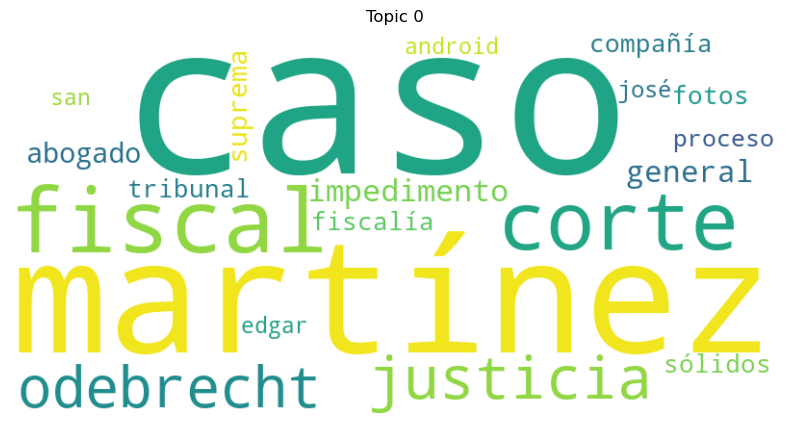

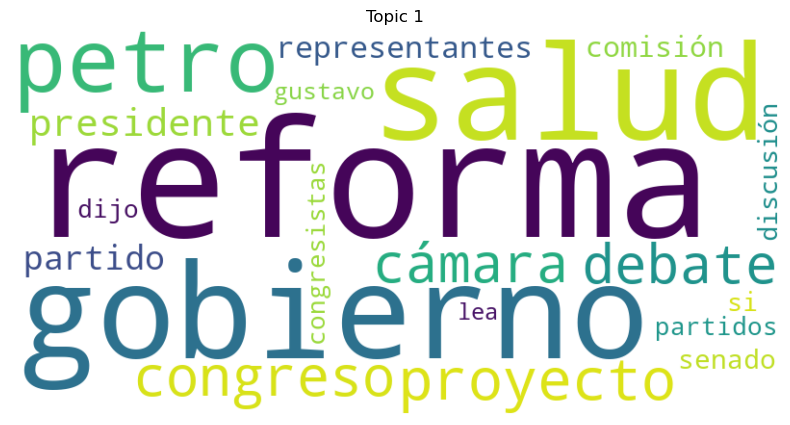

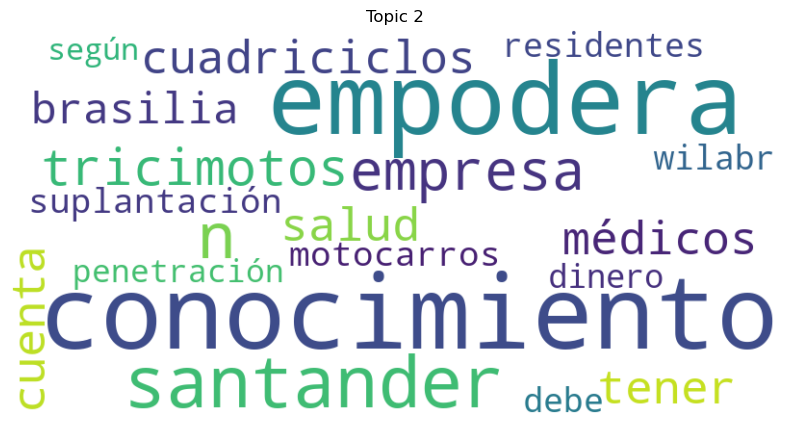

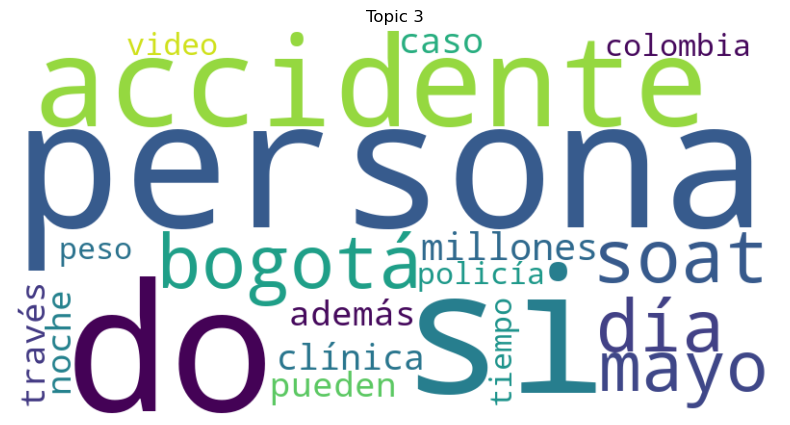

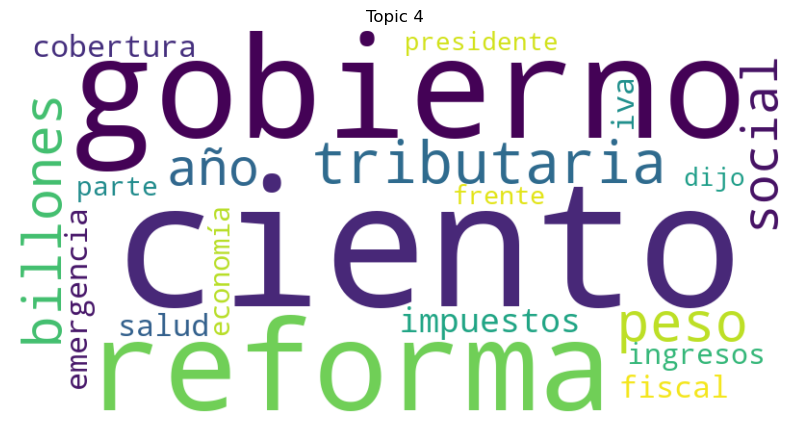

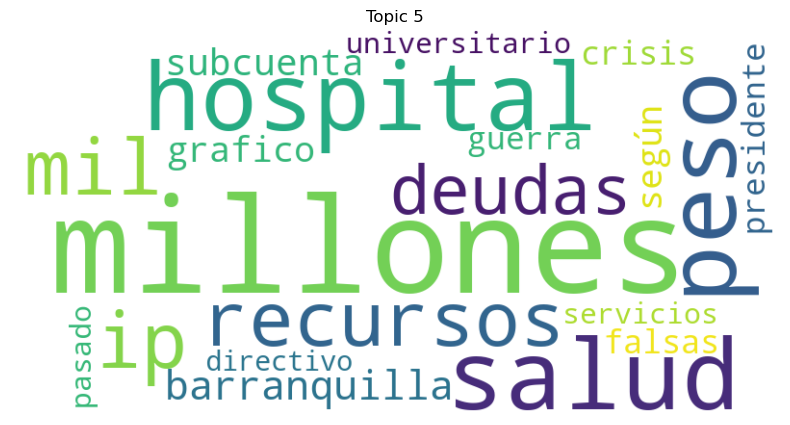

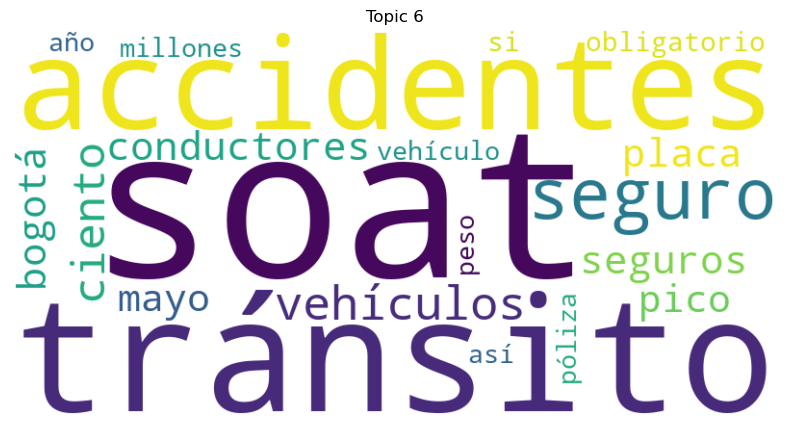

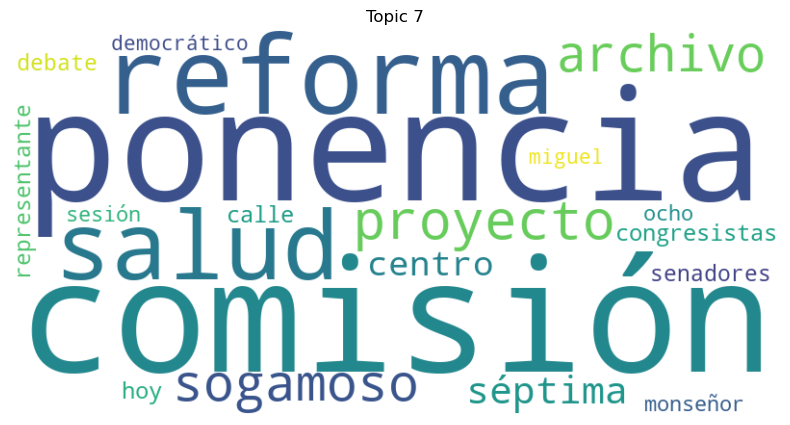

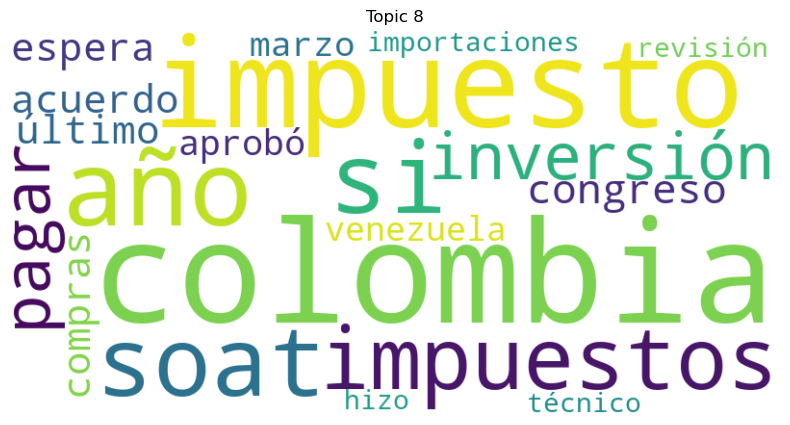

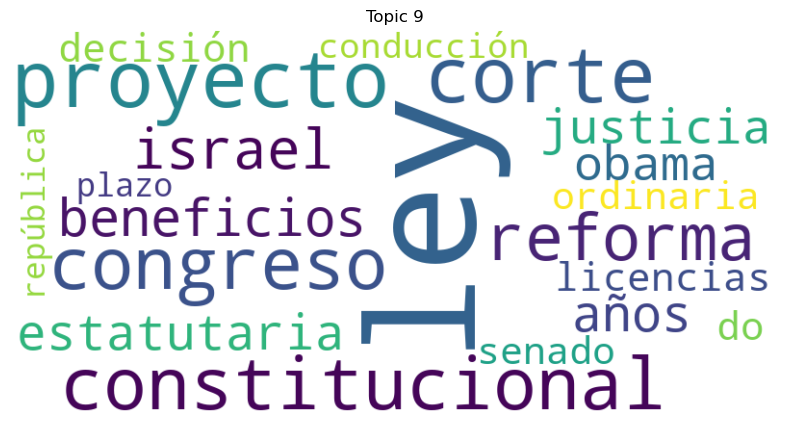

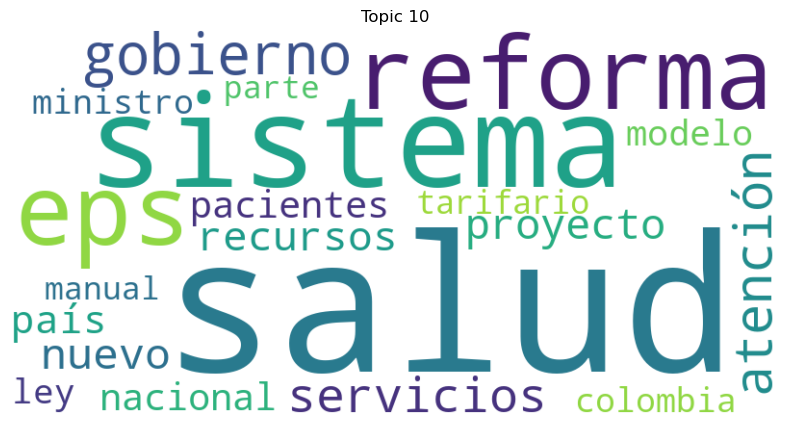

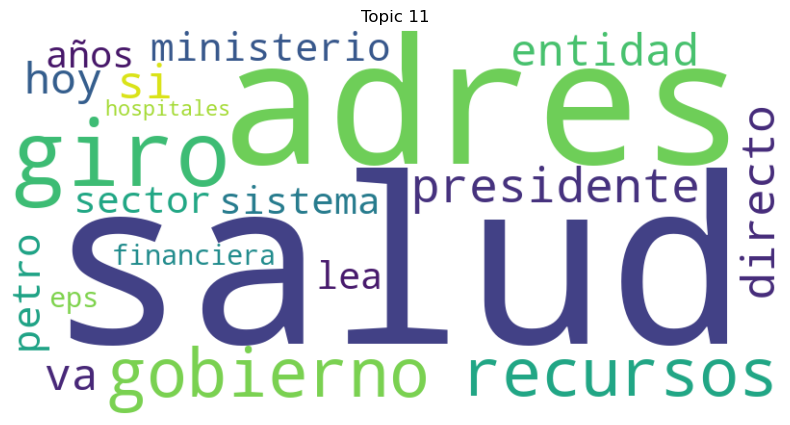

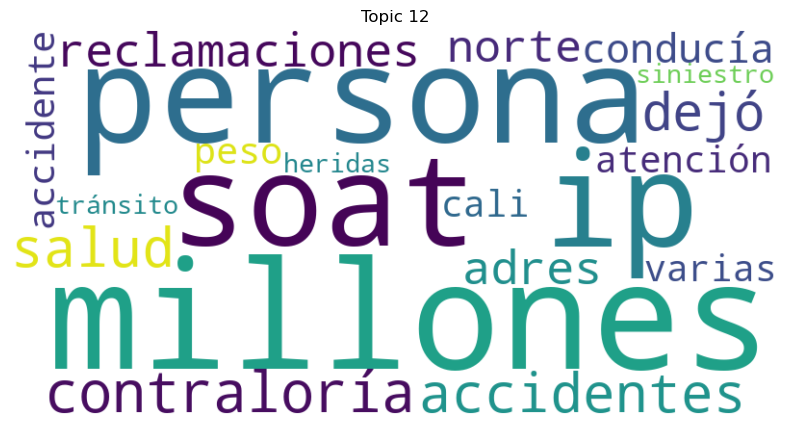

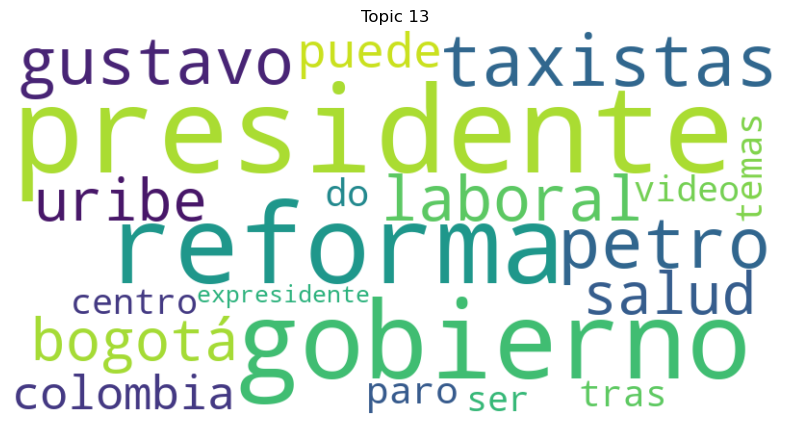

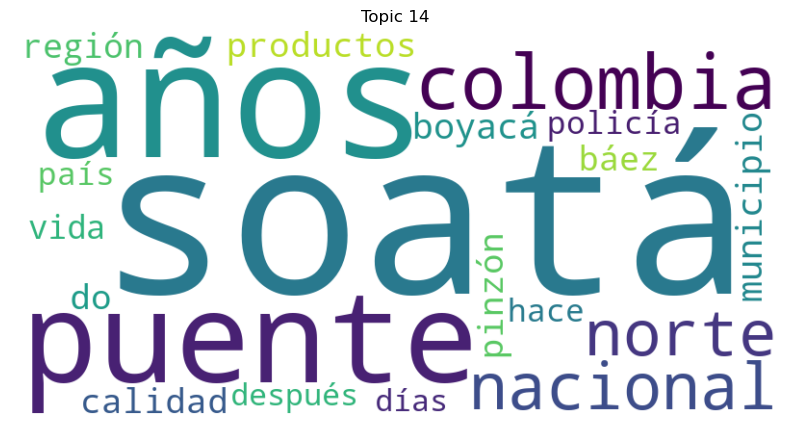

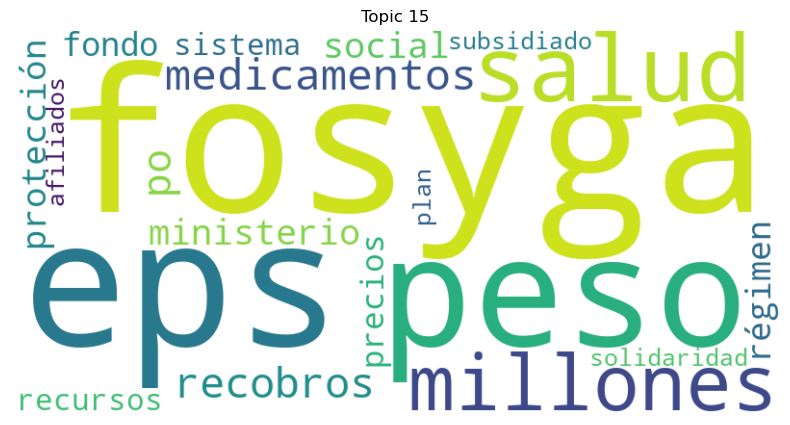

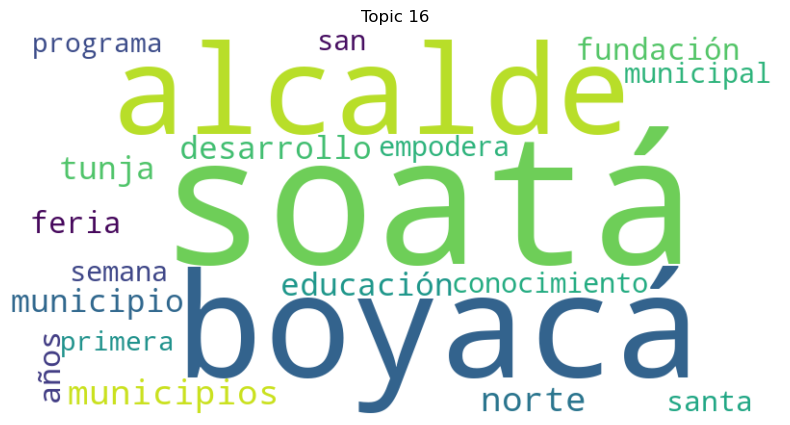

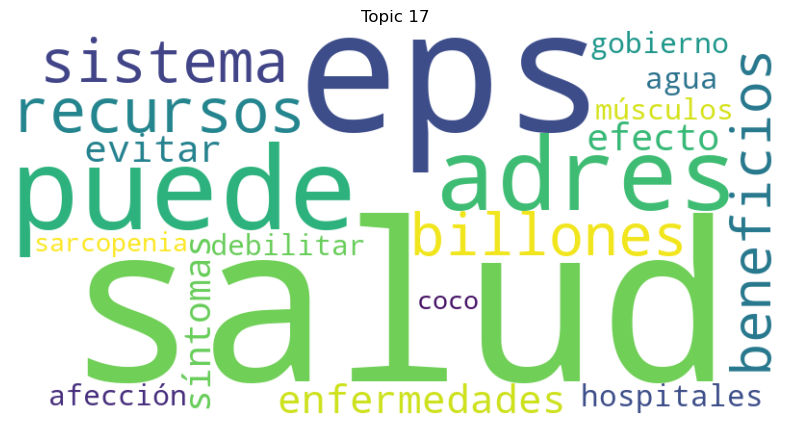

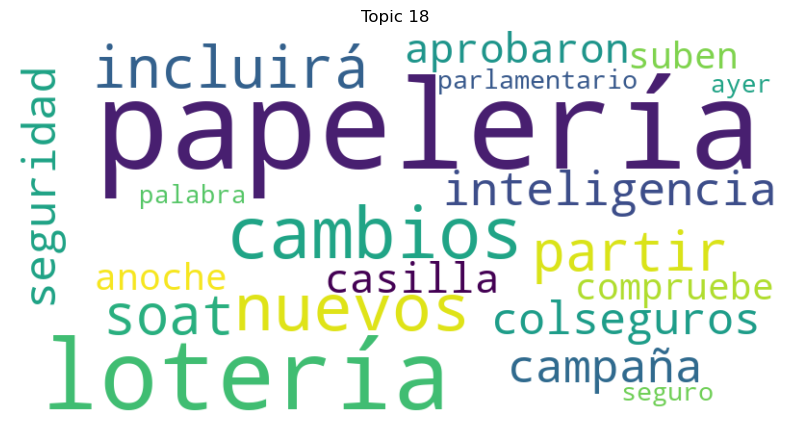

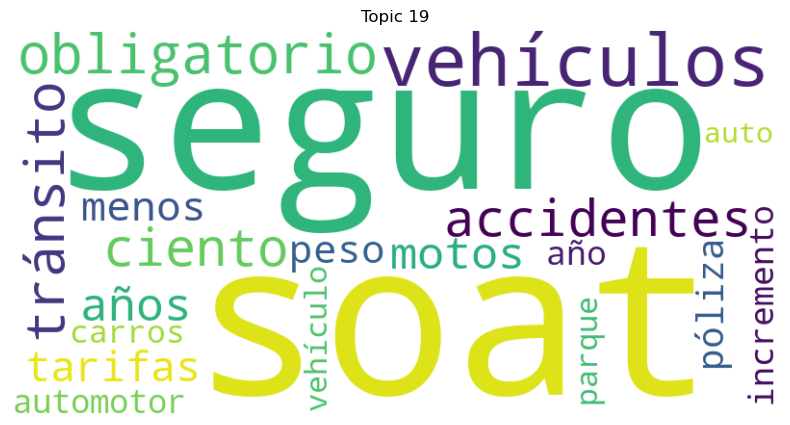

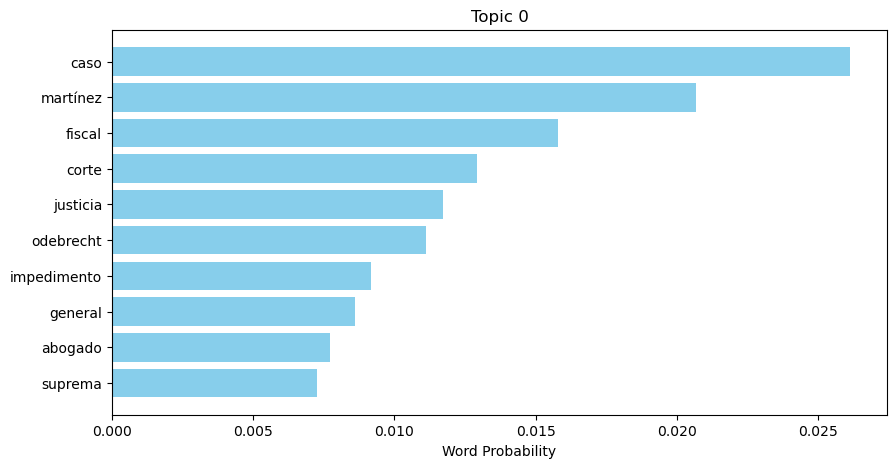

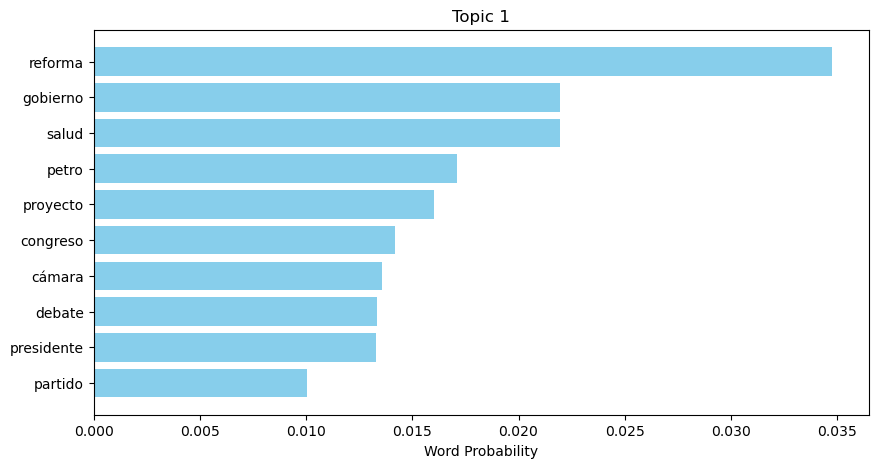

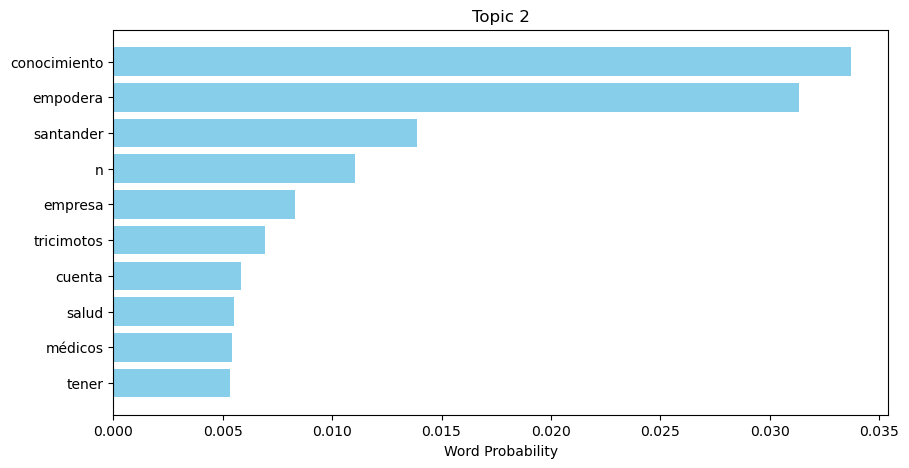

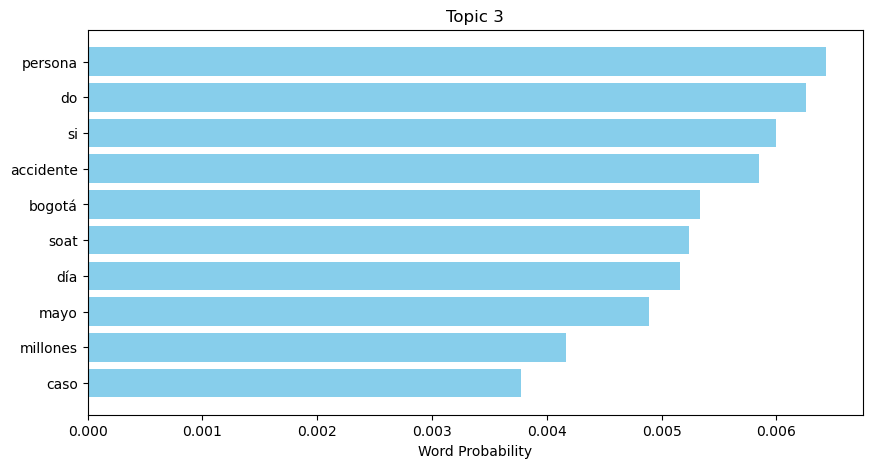

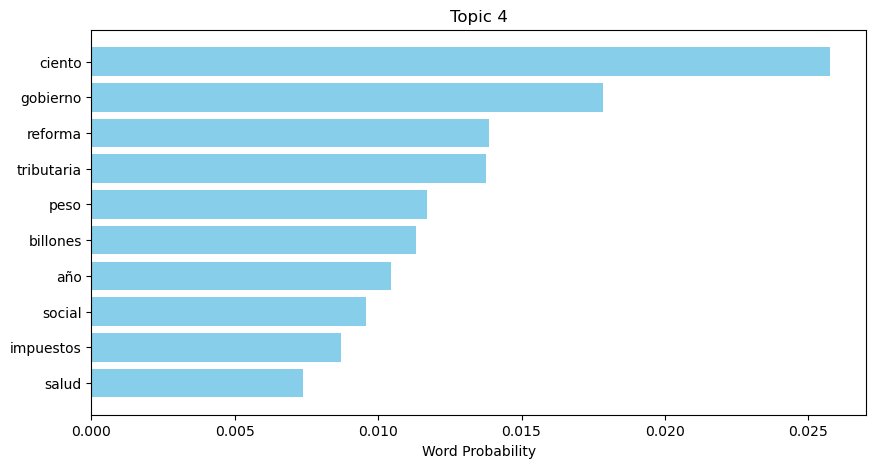

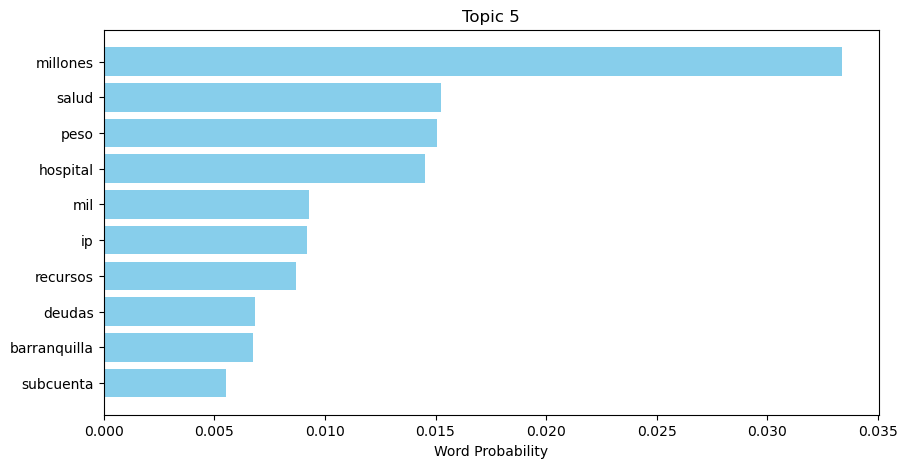

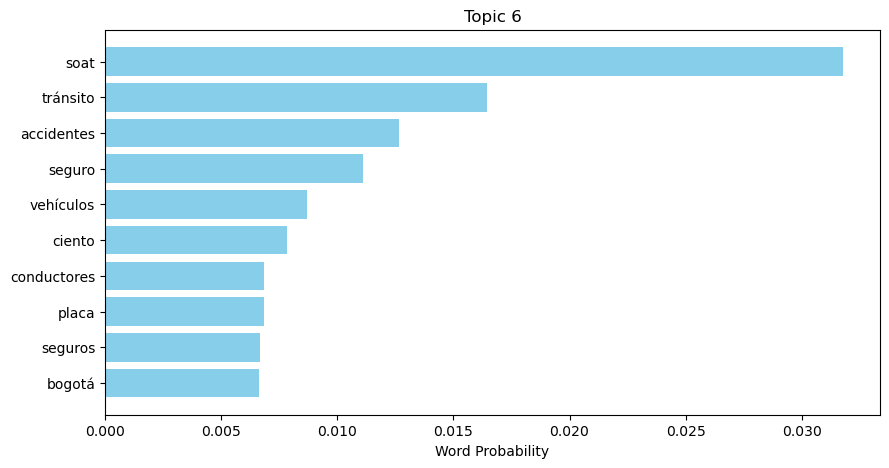

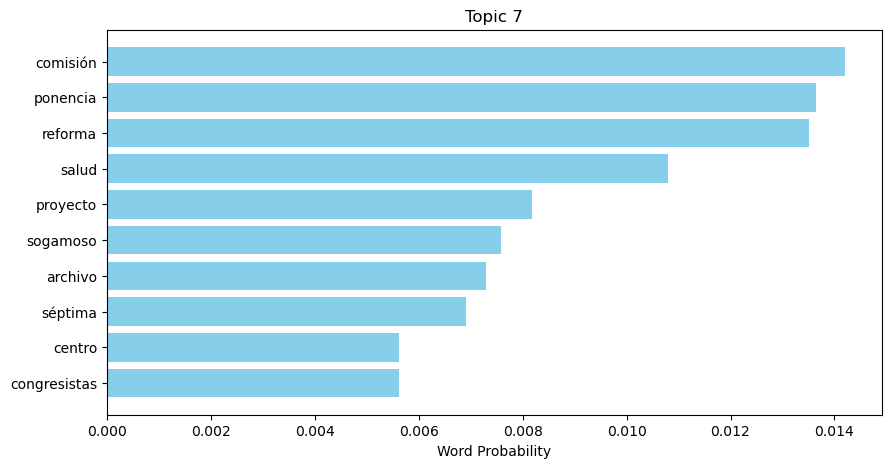

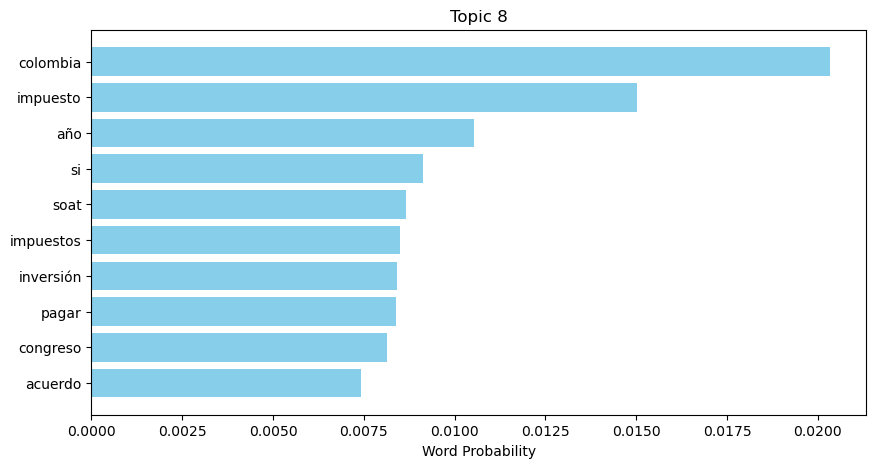

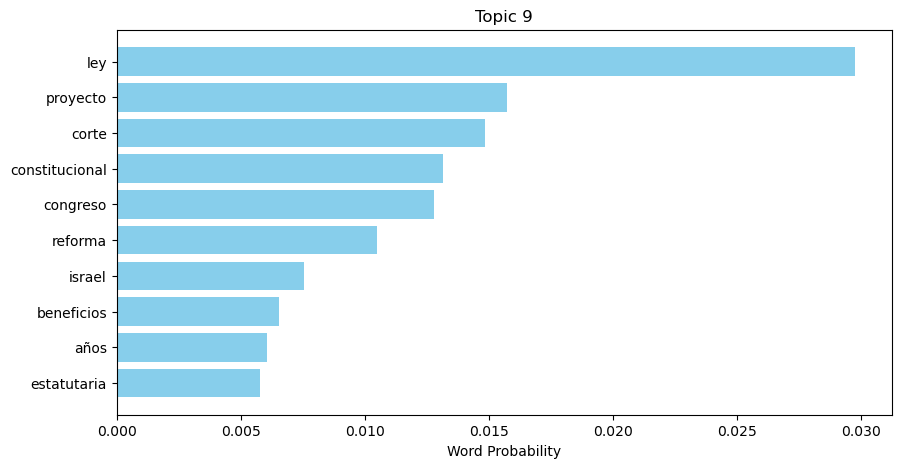

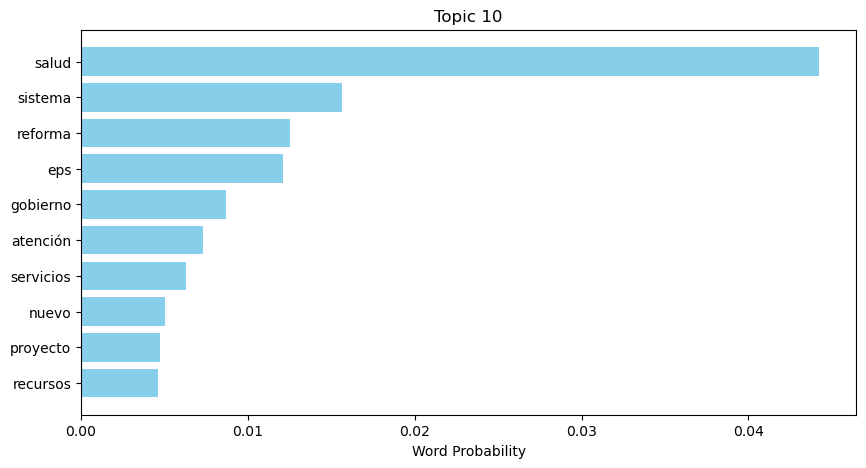

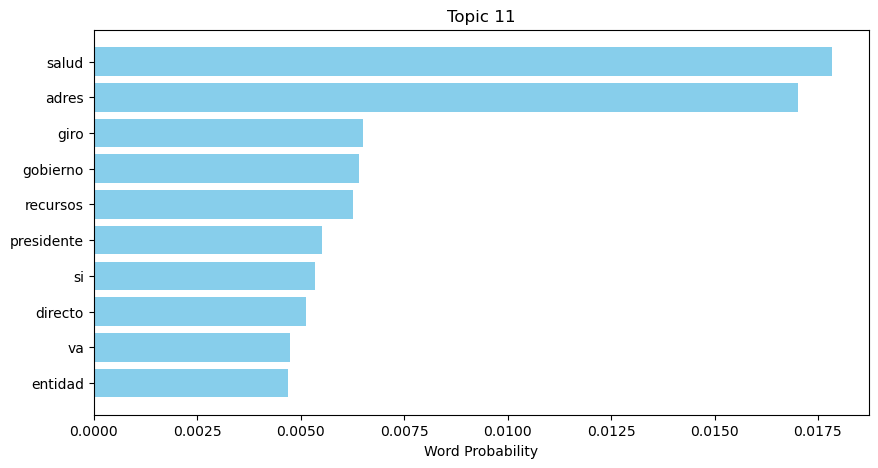

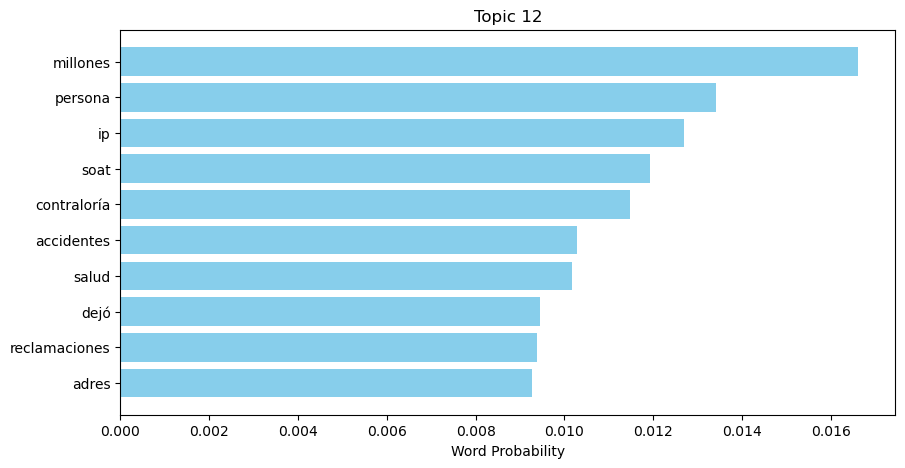

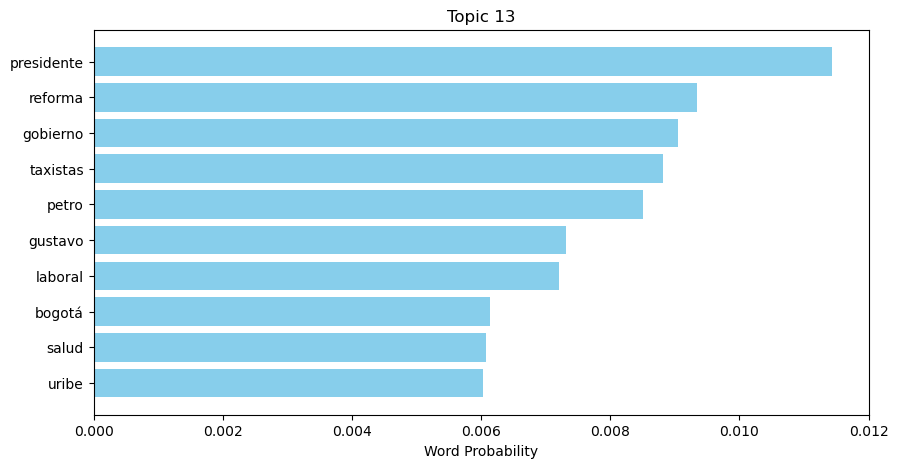

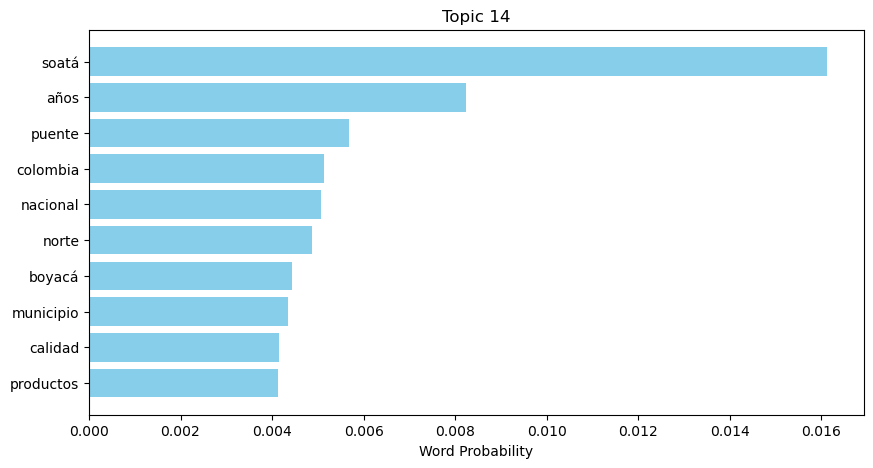

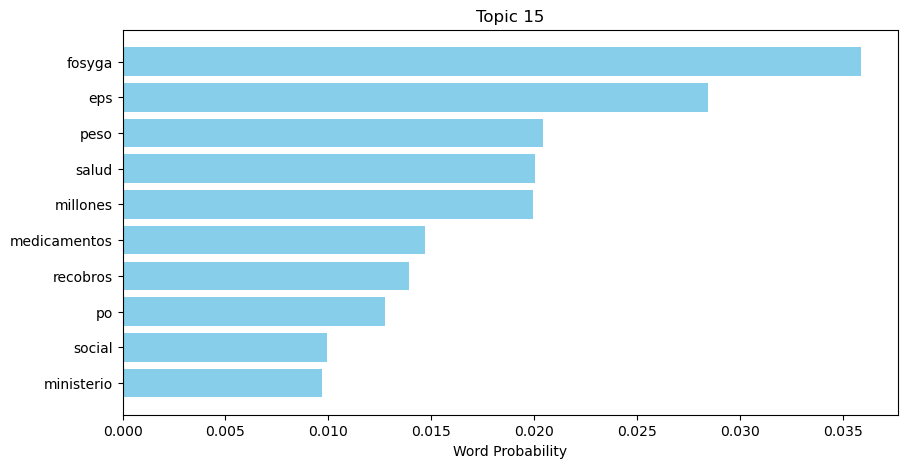

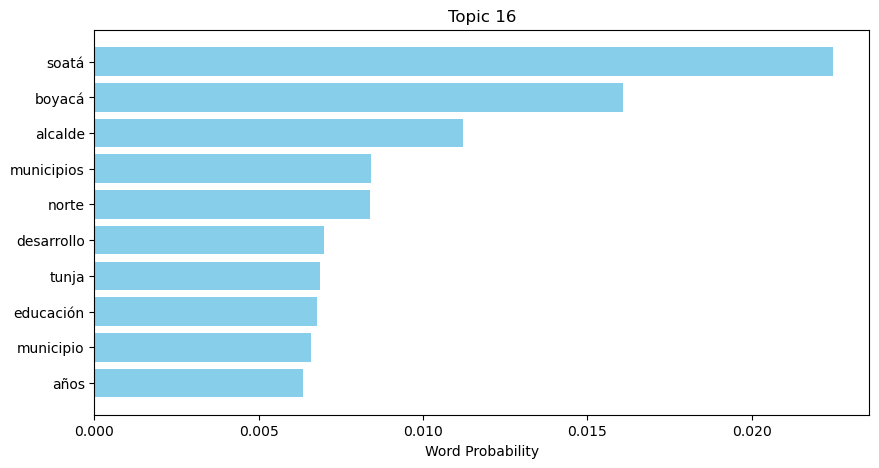

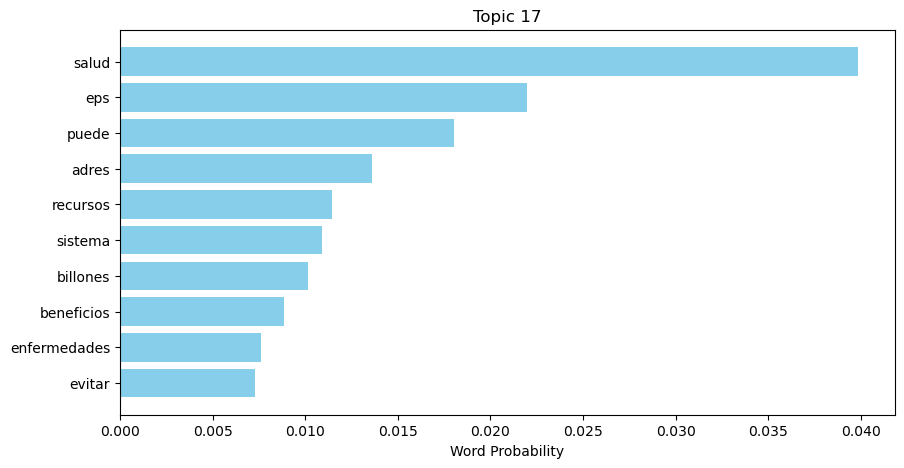

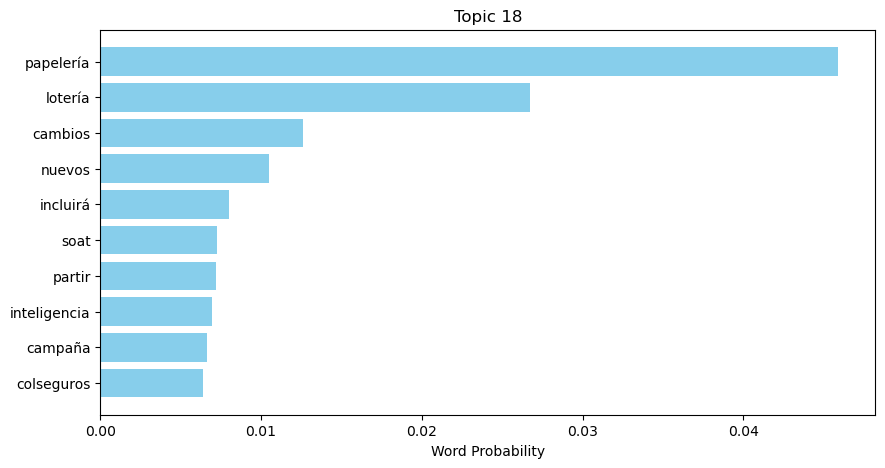

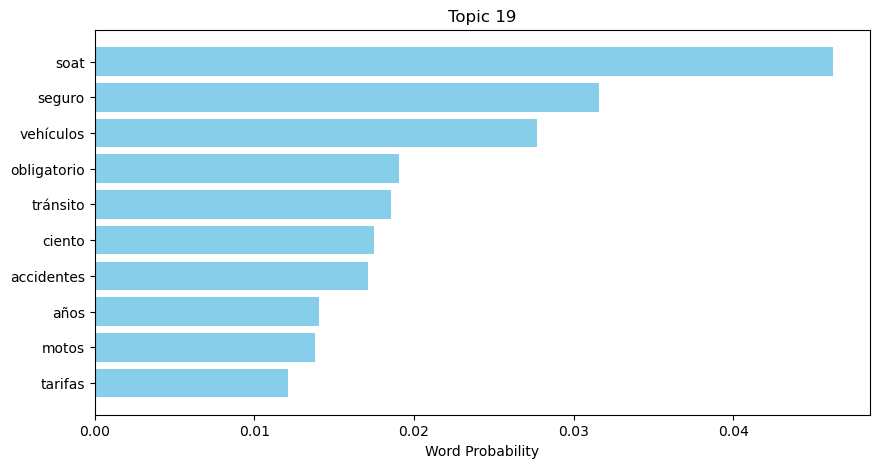

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to display word clouds for each topic
def display_wordclouds(lda_model):
    for topic_id in range(lda_model.num_topics):
        # Get the top words for the topic
        topic_words = lda_model.show_topic(topic_id, topn=20)
        # Create a word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(topic_words))
        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_id}')
        plt.axis('off')
        plt.show()

# Function to display bar plots for each topic
def display_barplots(lda_model):
    for topic_id in range(lda_model.num_topics):
        # Get the top words for the topic
        topic_words = lda_model.show_topic(topic_id, topn=10)
        # Extract words and their probabilities
        words = [word for word, _ in topic_words]
        probabilities = [prob for _, prob in topic_words]
        # Plot bar plot
        plt.figure(figsize=(10, 5))
        plt.barh(words, probabilities, color='skyblue')
        plt.xlabel('Word Probability')
        plt.title(f'Topic {topic_id}')
        plt.gca().invert_yaxis()
        plt.show()

# Display word clouds for each topic
display_wordclouds(lda_model)

# Display bar plots for each topic
display_barplots(lda_model)

Usa LDA para agrupar documentos similares: Entrena un modelo LDA en tu corpus de documentos. Luego, asigna cada documento a su tópico más probable.

Agrupa documentos por tópico: Agrupa los documentos según los tópicos asignados.

Extrae las palabras más frecuentes: Para cada grupo de documentos, extrae las palabras más frecuentes.

Encuentra el grupo de palabras más frecuentes: Busca el grupo más frecuente de palabras consecutivas (n-gramas) dentro de cada grupo de documentos.

- Paso 1: Entrena el modelo LDA en tu corpus de documentos.
- Paso 2: Agrupa los documentos por sus tópicos asignados según el modelo LDA.
- Paso 3: Para cada grupo de documentos, extrae las palabras más frecuentes.
- Paso 4: Para cada grupo de documentos, encuentra los pares de palabras consecutivas más frecuentes (bigramas).


Puedes ajustar parámetros como el número de tópicos (num_topics), el número de palabras más frecuentes a mostrar y el número de n-gramas más frecuentes a mostrar según tus necesidades específicas.

Grupo 0:
Palabras más frecuentes: [('caso', 45), ('millones', 37), ('martínez', 32), ('peso', 28), ('fiscal', 26), ('corte', 25), ('fondos', 21), ('odebrecht', 21), ('justicia', 18), ('pérdidas', 18)]


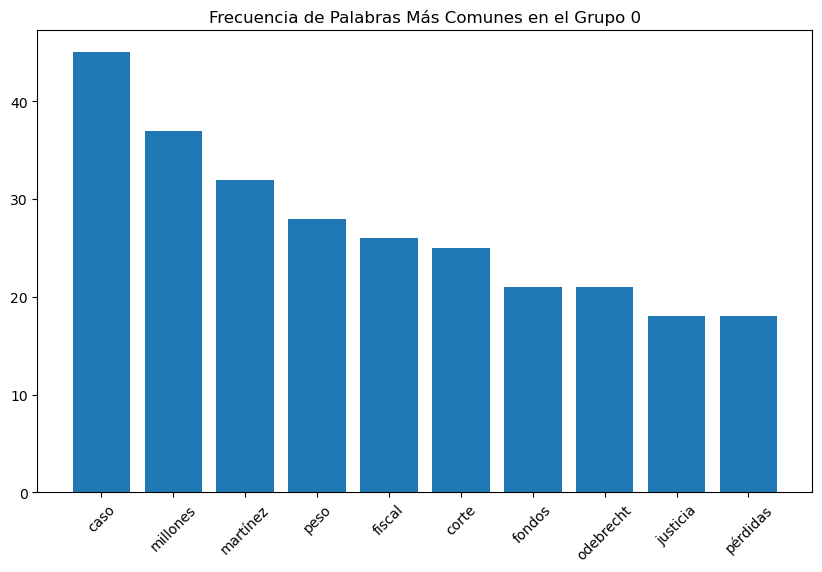

Grupo 1:
Palabras más frecuentes: [('reforma', 3452), ('salud', 3339), ('gobierno', 2305), ('petro', 1767), ('presidente', 1476), ('proyecto', 1423), ('congreso', 1309), ('cámara', 1269), ('debate', 1237), ('partido', 961)]


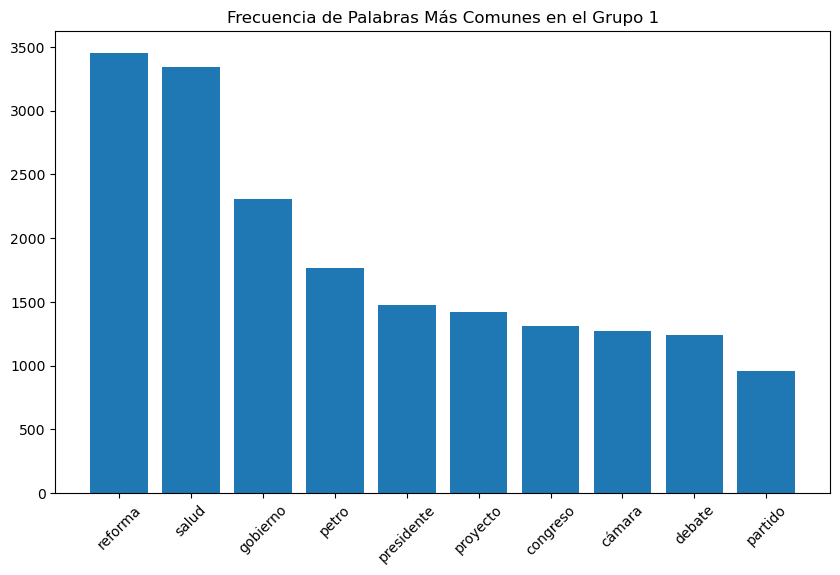

Grupo 2:
Palabras más frecuentes: [('salud', 44), ('reforma', 18), ('conocimiento', 14), ('medicina', 13), ('empodera', 13), ('colombia', 13), ('decisión', 13), ('cafesalud', 13), ('fosyga', 10), ('según', 9)]


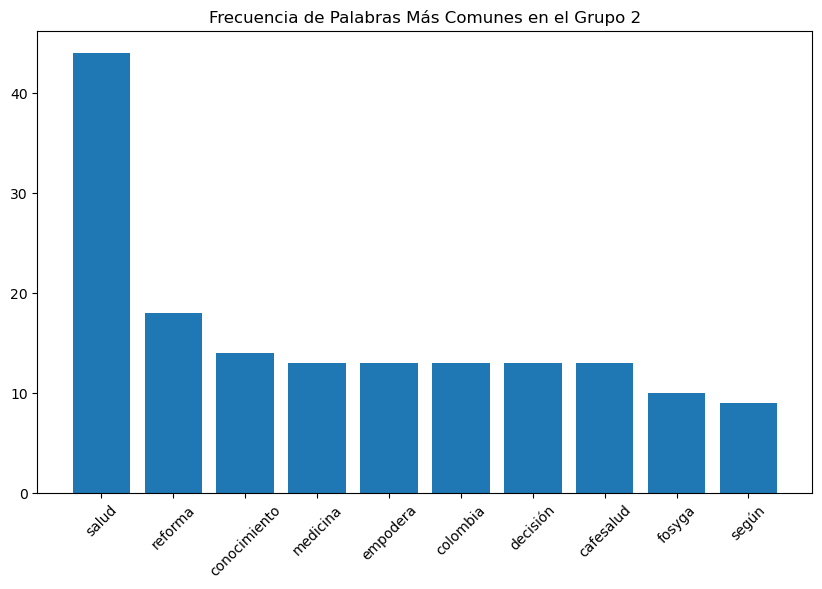

Grupo 3:
Palabras más frecuentes: [('si', 163), ('soat', 159), ('años', 148), ('do', 144), ('salud', 126), ('colombia', 116), ('persona', 100), ('accidente', 96), ('bogotá', 92), ('solo', 90)]


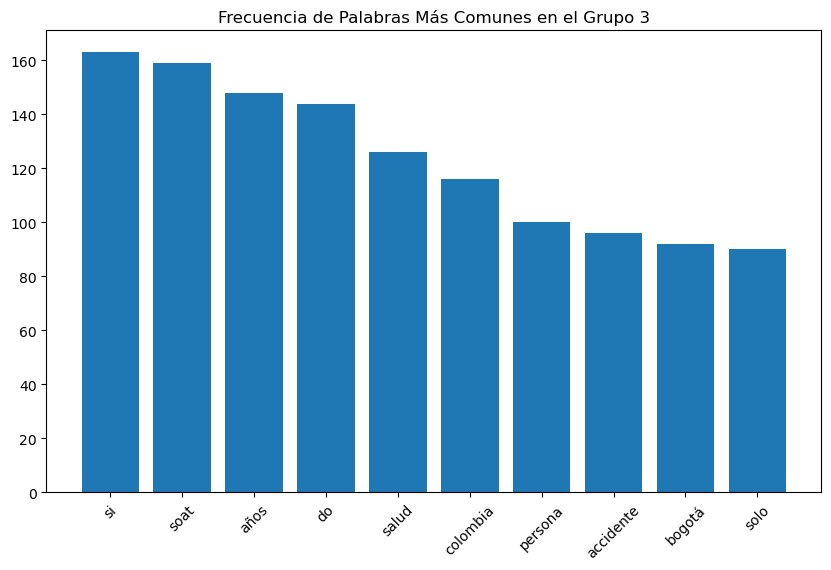

Grupo 4:
Palabras más frecuentes: [('reforma', 413), ('ciento', 245), ('tributaria', 241), ('gobierno', 184), ('impuestos', 145), ('iva', 117), ('proyecto', 117), ('salud', 109), ('impuesto', 108), ('peso', 108)]


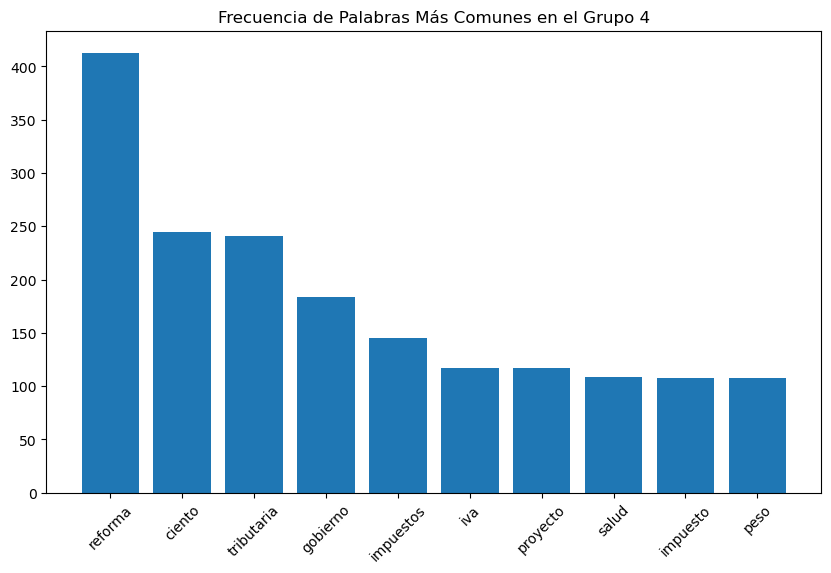

Grupo 5:
Palabras más frecuentes: [('salud', 23), ('hospital', 22), ('millones', 15), ('peso', 13), ('cúcuta', 12), ('gobierno', 8), ('mil', 8), ('gerente', 8), ('recursos', 8), ('según', 8)]


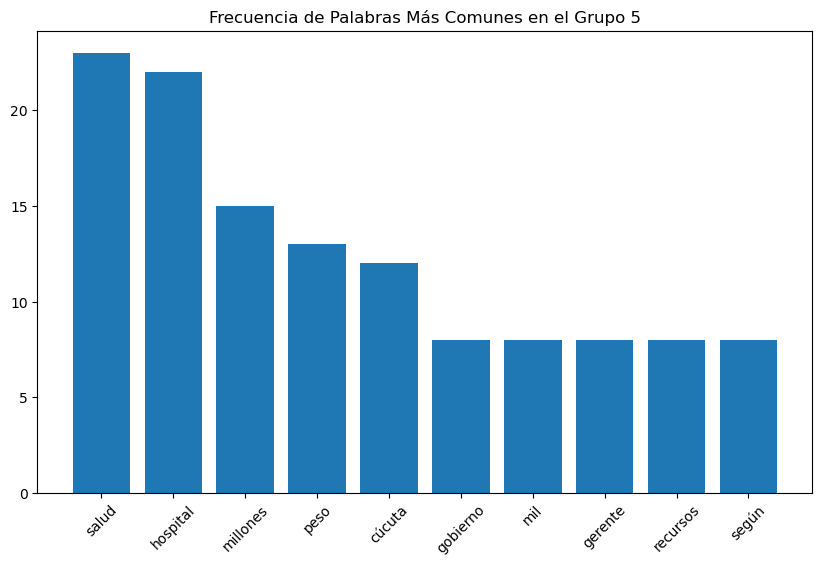

Grupo 6:
Palabras más frecuentes: [('soat', 1408), ('tránsito', 707), ('accidentes', 561), ('seguro', 538), ('vehículos', 417), ('ciento', 383), ('peso', 322), ('millones', 299), ('placa', 298), ('obligatorio', 293)]


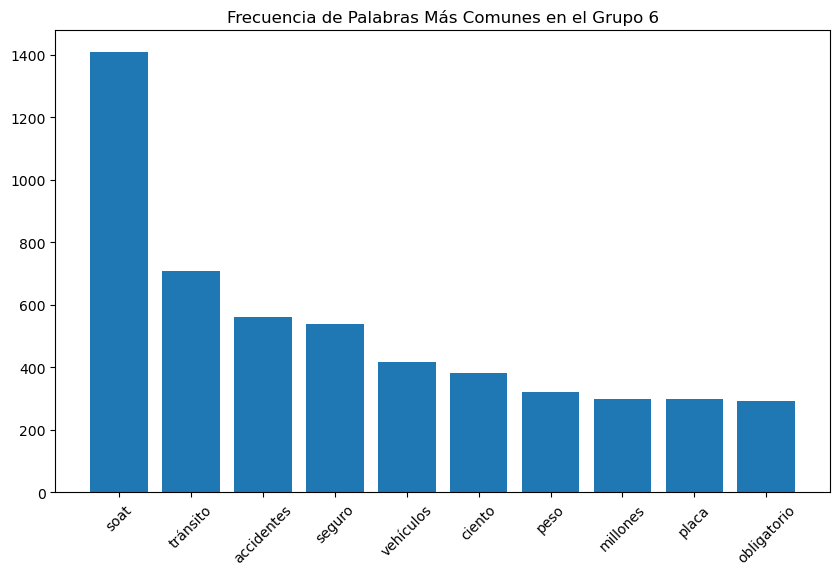

Grupo 7:
Palabras más frecuentes: [('salud', 239), ('reforma', 217), ('comisión', 145), ('proyecto', 110), ('ponencia', 99), ('gobierno', 90), ('debate', 83), ('congresistas', 63), ('partido', 60), ('séptima', 58)]


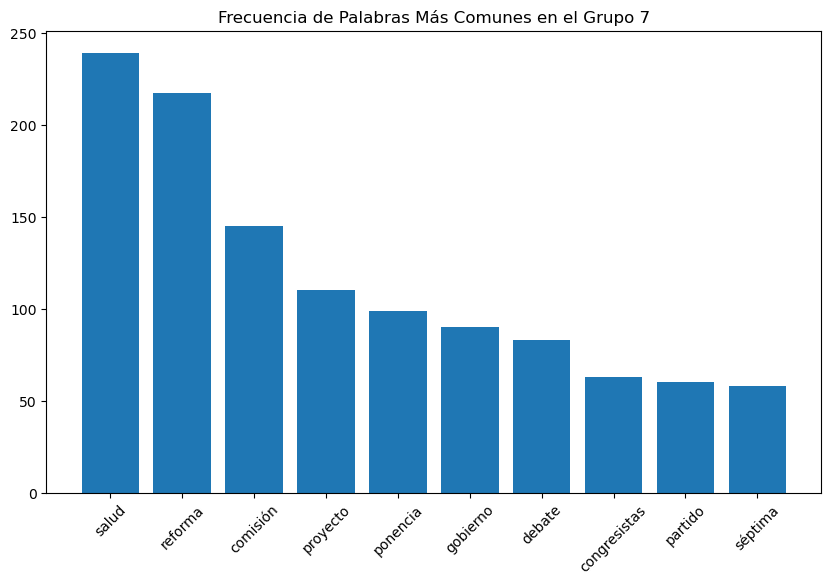

Grupo 8:
Palabras más frecuentes: [('soat', 92), ('colombia', 72), ('año', 50), ('impuesto', 50), ('impuestos', 45), ('pagar', 36), ('si', 36), ('reforma', 35), ('tránsito', 35), ('seguro', 34)]


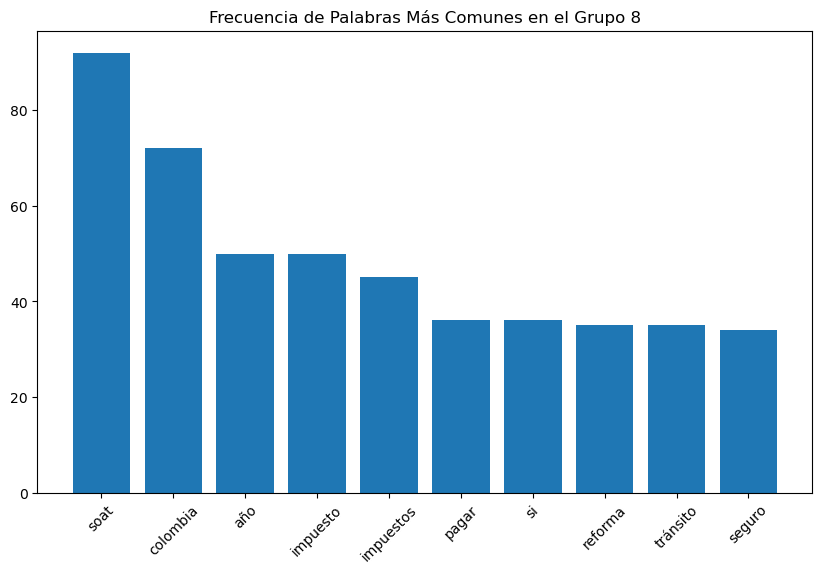

Grupo 9:
Palabras más frecuentes: [('reforma', 226), ('salud', 112), ('congreso', 78), ('ley', 77), ('proyecto', 76), ('corte', 65), ('presidente', 65), ('constitucional', 63), ('senado', 62), ('cámara', 56)]


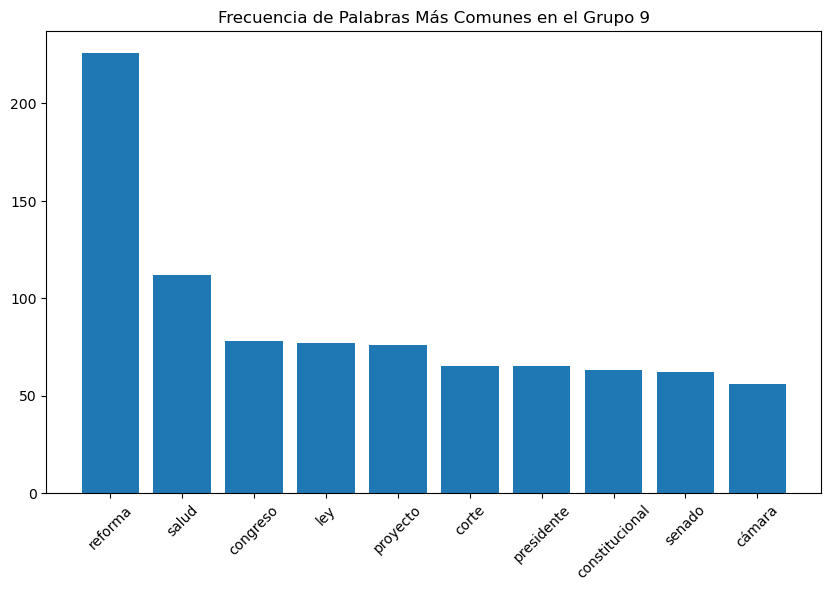

Grupo 10:
Palabras más frecuentes: [('salud', 7061), ('reforma', 3067), ('sistema', 2372), ('eps', 1973), ('gobierno', 1655), ('proyecto', 1086), ('atención', 1015), ('recursos', 856), ('ley', 837), ('servicios', 835)]


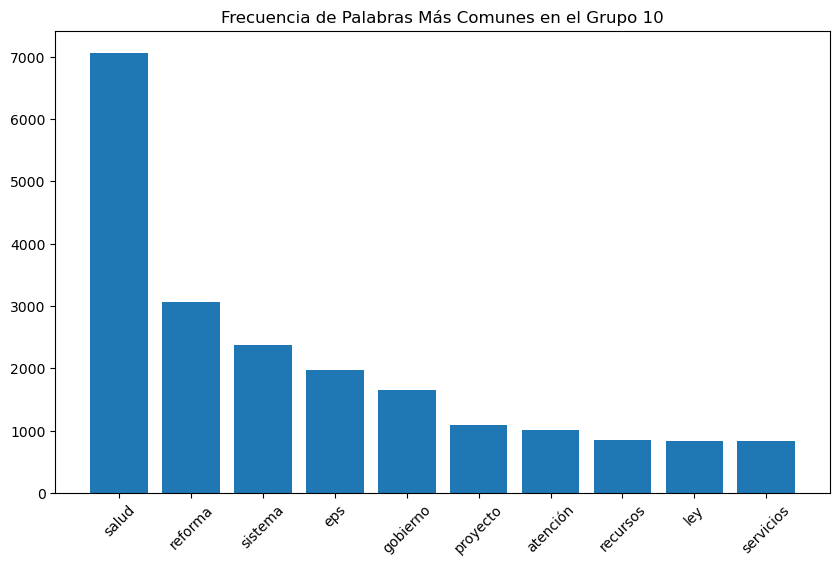

Grupo 11:
Palabras más frecuentes: [('salud', 192), ('eps', 76), ('adres', 74), ('recursos', 62), ('reforma', 61), ('gobierno', 48), ('soat', 42), ('si', 35), ('upc', 35), ('hospitales', 32)]


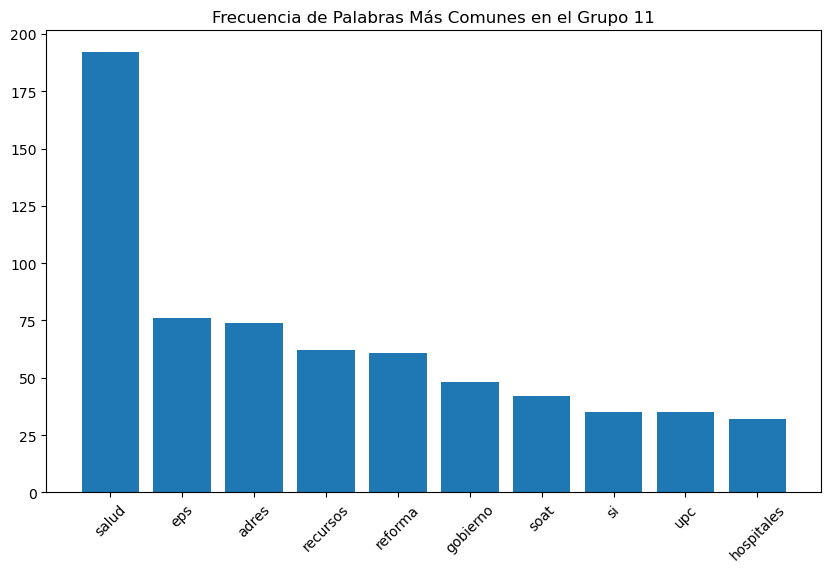

Grupo 12:
Palabras más frecuentes: [('soat', 114), ('millones', 94), ('salud', 90), ('tránsito', 68), ('accidentes', 66), ('persona', 65), ('adres', 63), ('ip', 62), ('peso', 56), ('contraloría', 55)]


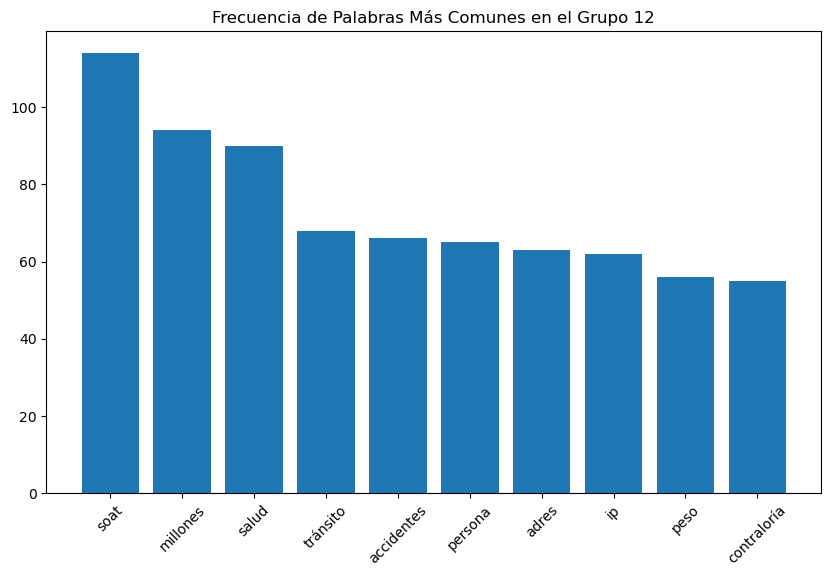

Grupo 13:
Palabras más frecuentes: [('reforma', 292), ('salud', 287), ('petro', 175), ('presidente', 151), ('gobierno', 116), ('formar', 95), ('favor', 93), ('votó', 89), ('gustavo', 86), ('laboral', 78)]


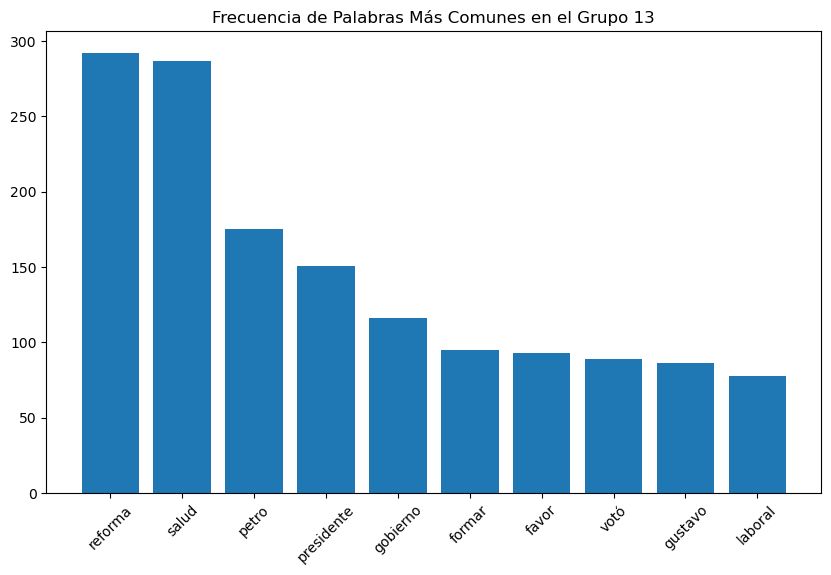

Grupo 14:
Palabras más frecuentes: [('soatá', 154), ('colombia', 113), ('años', 93), ('salud', 58), ('reforma', 53), ('boyacá', 53), ('do', 51), ('país', 49), ('norte', 49), ('nacional', 47)]


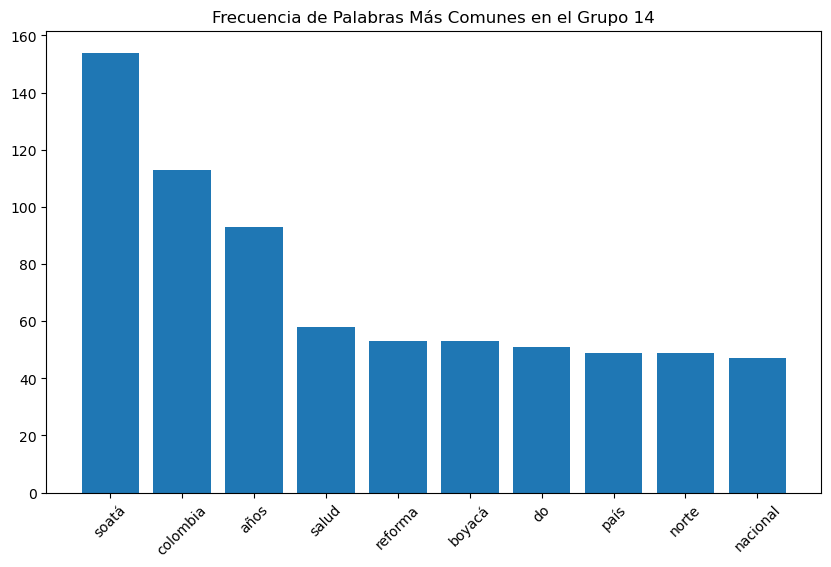

Grupo 15:
Palabras más frecuentes: [('fosyga', 1307), ('eps', 1273), ('salud', 1177), ('millones', 771), ('peso', 761), ('recobros', 643), ('medicamentos', 565), ('po', 549), ('ministerio', 427), ('social', 374)]


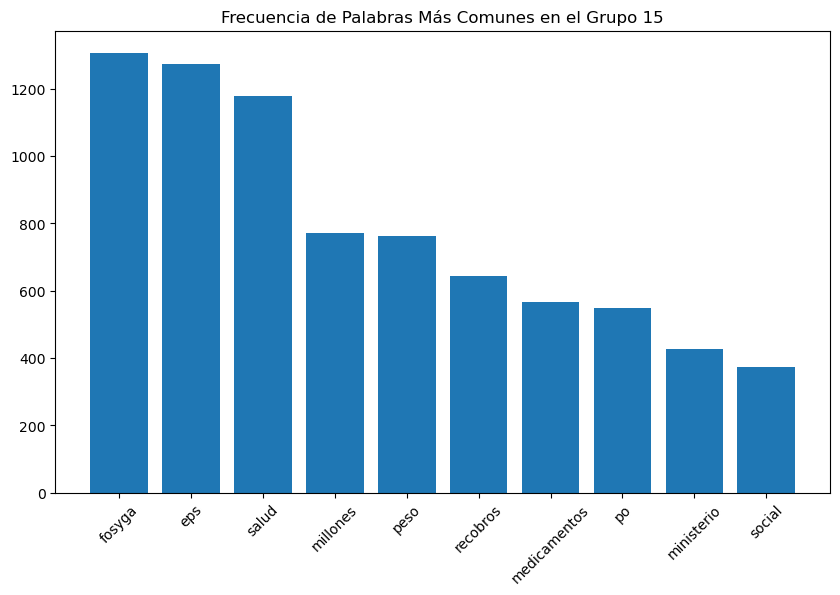

Grupo 16:
Palabras más frecuentes: [('soatá', 108), ('reforma', 76), ('boyacá', 64), ('salud', 62), ('alcalde', 60), ('conocimiento', 49), ('empodera', 48), ('municipios', 39), ('municipio', 35), ('años', 33)]


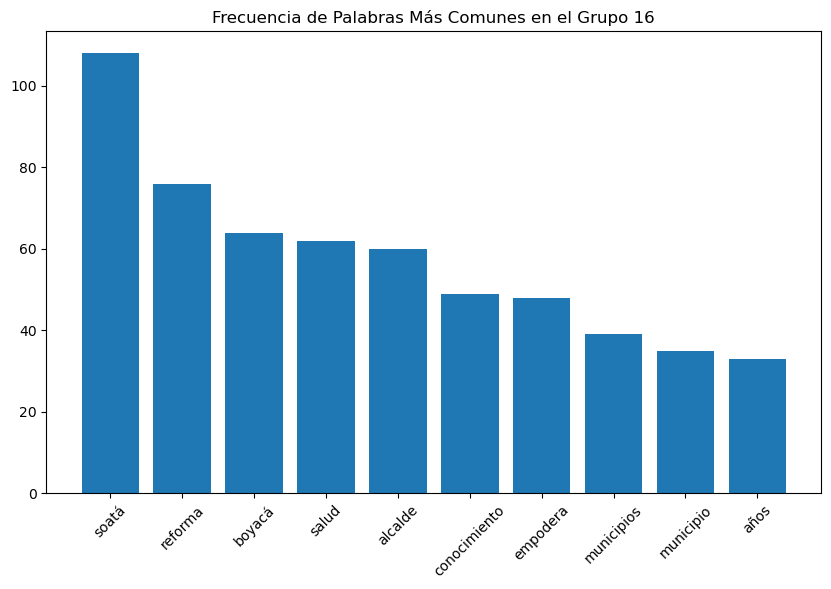

Grupo 17:
Palabras más frecuentes: [('salud', 1013), ('eps', 418), ('puede', 370), ('sistema', 255), ('adres', 224), ('recursos', 219), ('reforma', 197), ('beneficios', 164), ('billones', 156), ('evitar', 156)]


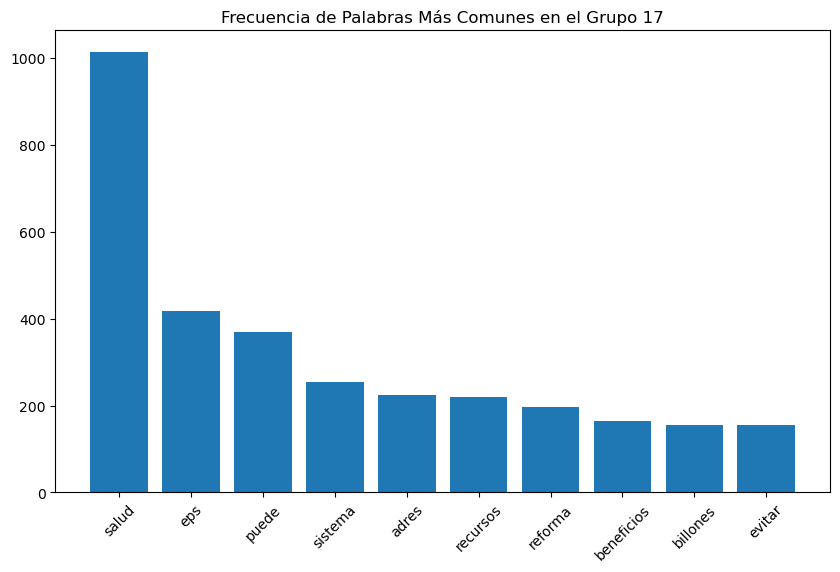

Grupo 18:
Palabras más frecuentes: [('reforma', 14), ('tributaria', 13), ('proyecto', 13), ('salud', 11), ('cada', 11), ('ser', 11), ('ayer', 10), ('impuestos', 10), ('ciento', 10), ('comisiones', 8)]


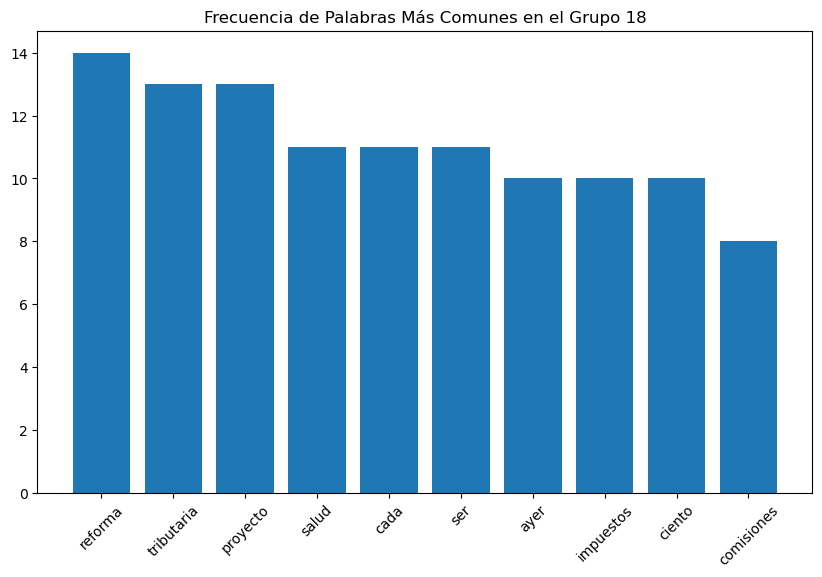

Grupo 19:
Palabras más frecuentes: [('soat', 313), ('seguro', 180), ('vehículos', 178), ('tránsito', 134), ('accidentes', 124), ('obligatorio', 116), ('ciento', 116), ('motos', 95), ('tarifas', 75), ('años', 71)]


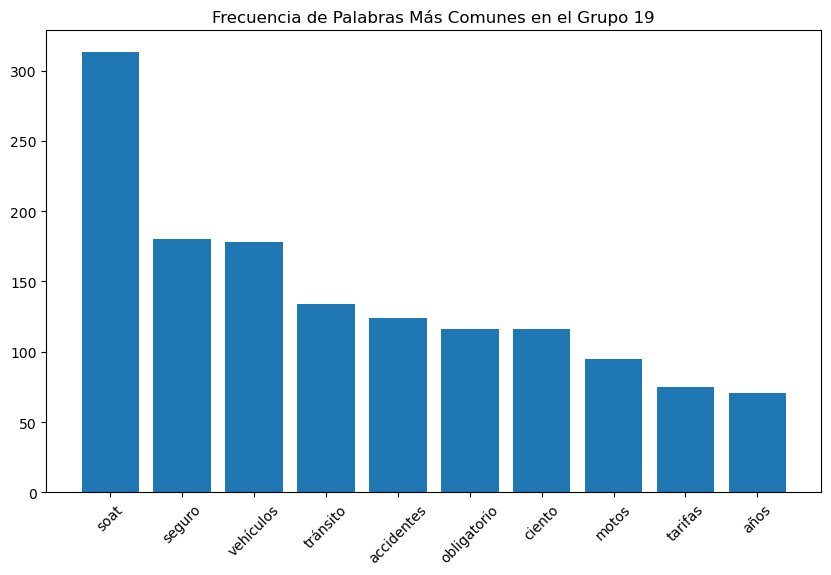

In [20]:
from gensim import corpora, models
from collections import Counter
import matplotlib.pyplot as plt

# Paso 1: Entrenar el modelo LDA

# Paso 2: Agrupar documentos por tópico
document_topics = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
grouped_documents = {topic: [] for topic in range(lda_model.num_topics)}
for doc_id, topic in enumerate(document_topics):
    grouped_documents[topic].append(doc_id)

# Paso 3: Extraer las palabras más frecuentes para cada grupo
for topic, documents in grouped_documents.items():
    print(f"Grupo {topic}:")
    group_texts = [preprocessed_texts[doc_id] for doc_id in documents]
    all_words = [word for text in group_texts for word in text]
    word_freq = Counter(all_words)
    most_common_words = word_freq.most_common(10)  # Obtener las 10 palabras más frecuentes
    print("Palabras más frecuentes:", most_common_words)
    
    # Graficar la frecuencia de las palabras más comunes
    words, frequencies = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.title(f"Frecuencia de Palabras Más Comunes en el Grupo {topic}")
    plt.xticks(rotation=45)
    plt.show()

Una vez que hayas entrenado un modelo LDA con tu corpus de datos de texto, hay varias tareas útiles y análisis que puedes realizar utilizando el modelo entrenado. Aquí tienes algunas tareas comunes:

- Visualización de Tópicos: Visualiza los tópicos y sus palabras asociadas usando nubes de palabras, gráficos de barras u otras representaciones gráficas. Esto puede ayudarte a entender los temas principales presentes en tus documentos.

- Distribución Documento-Tópico: Analiza la distribución de tópicos a través de tus documentos. Puedes identificar qué tópicos son más prevalentes en tu corpus y cómo los documentos individuales se relacionan con estos tópicos.

- Interpretación de Tópicos: Interpreta los tópicos generados por el modelo LDA examinando las palabras principales asociadas con cada tópico. Esto puede ayudarte a asignar etiquetas significativas a los tópicos y entender su significado semántico.

- Agrupación de Documentos: Usa las distribuciones documento-tópico para agrupar documentos similares juntos. Esto puede ayudarte a identificar grupos de documentos que comparten temas o tópicos similares.

- Extracción de Palabras Clave: Extrae palabras clave o frases clave de los documentos basándote en sus distribuciones de tópicos. Esto puede ayudarte a identificar términos o conceptos importantes dentro de cada documento.

- Generación de Texto: Genera nuevas muestras de texto basadas en las distribuciones de tópicos aprendidas. Esto puede ser útil para tareas como la resumen de texto o la generación de contenido.

- Comparación de Documentos: Compara documentos basados en sus distribuciones de tópicos para identificar similitudes o diferencias entre ellos.

- Análisis de Sentimientos: Combina la modelización de tópicos LDA con análisis de sentimientos para analizar el sentimiento de los documentos dentro de cada tópico.

Estos son solo algunos ejemplos de los tipos de análisis que puedes realizar con un modelo LDA entrenado. Dependiendo de tu caso de uso específico y objetivos, puedes elegir enfocarte en una o más de estas tareas para obtener insights de tus datos de texto. Además, puedes explorar técnicas y metodologías avanzadas para mejorar aún más tus capacidades de análisis de texto.

Grupo 0:
N-gramas más frecuentes: [(('millones', 'peso'), 20), (('caso', 'odebrecht'), 13), (('corte', 'suprema'), 12), (('entidades', 'financieras'), 11), (('suprema', 'justicia'), 10)]


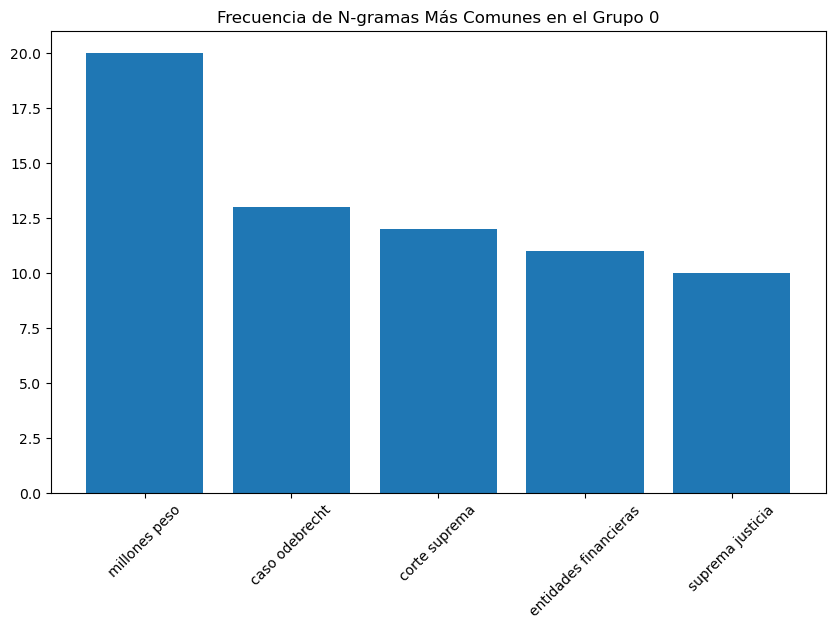

Grupo 1:
N-gramas más frecuentes: [(('reforma', 'salud'), 2075), (('gustavo', 'petro'), 637), (('presidente', 'gustavo'), 486), (('gobierno', 'petro'), 405), (('comisión', 'séptima'), 391)]


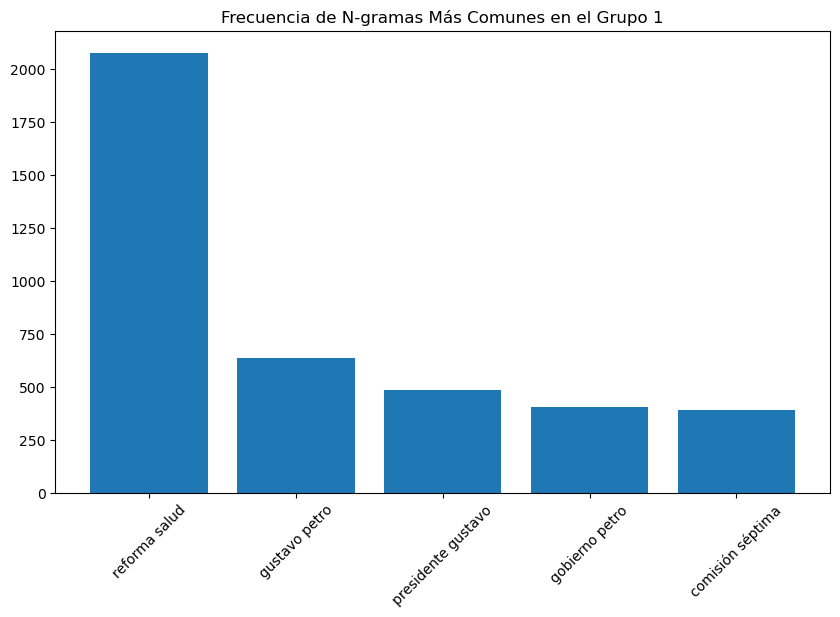

Grupo 2:
N-gramas más frecuentes: [(('empodera', 'conocimiento'), 13), (('medicina', 'prepagada'), 8), (('responsabilidad', 'fiscal'), 8), (('reforma', 'agraria'), 7), (('credencial', 'salud'), 7)]


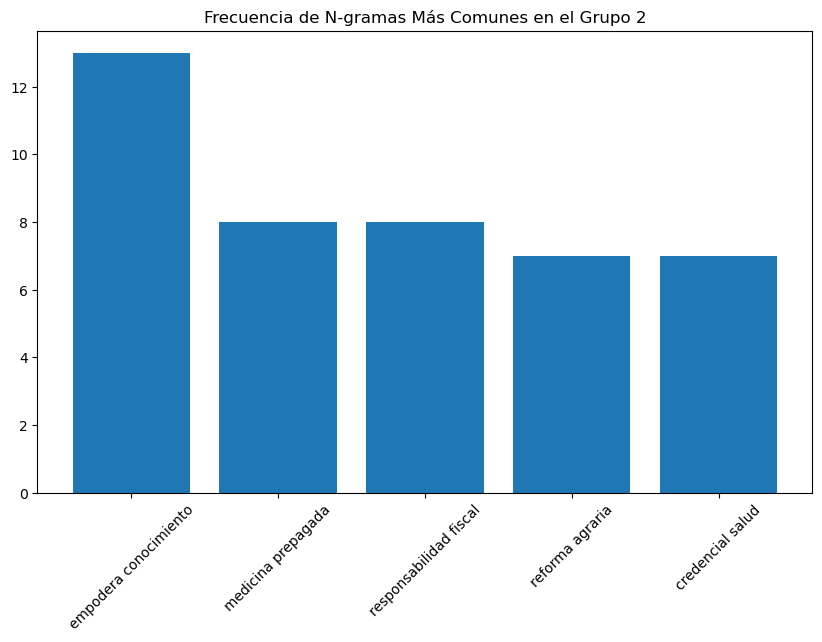

Grupo 3:
N-gramas más frecuentes: [(('millones', 'peso'), 53), (('temas', 'relacionados'), 44), (('miércoles', 'mayo'), 34), (('accidentes', 'tránsito'), 33), (('redes', 'sociales'), 27)]


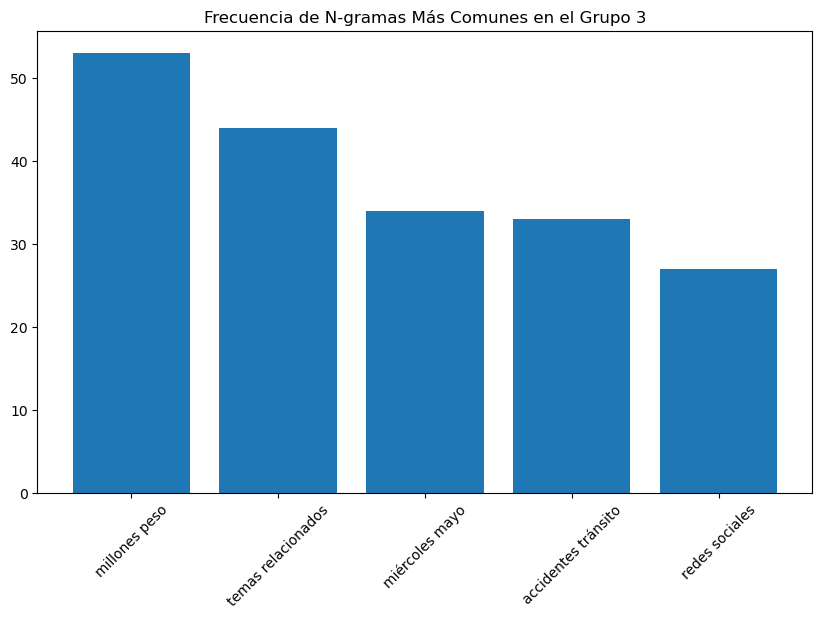

Grupo 4:
N-gramas más frecuentes: [(('reforma', 'tributaria'), 213), (('billones', 'peso'), 56), (('empodera', 'conocimiento'), 38), (('emergencia', 'social'), 28), (('millones', 'peso'), 27)]


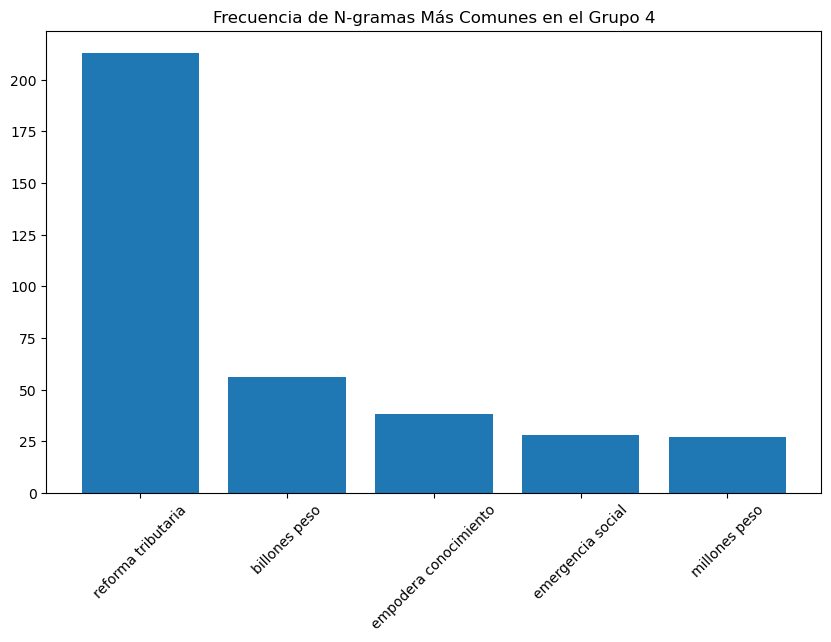

Grupo 5:
N-gramas más frecuentes: [(('millones', 'peso'), 13), (('mil', 'millones'), 8), (('erasmo', 'meoz'), 7), (('hospital', 'universitario'), 7), (('gerente', 'hospital'), 4)]


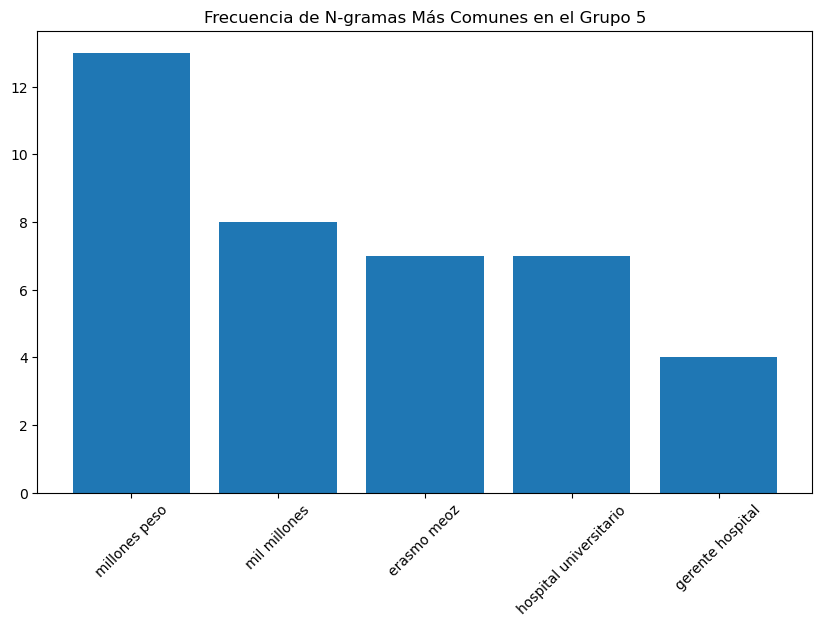

Grupo 6:
N-gramas más frecuentes: [(('accidentes', 'tránsito'), 413), (('pico', 'placa'), 267), (('seguro', 'obligatorio'), 265), (('obligatorio', 'accidentes'), 185), (('tránsito', 'soat'), 164)]


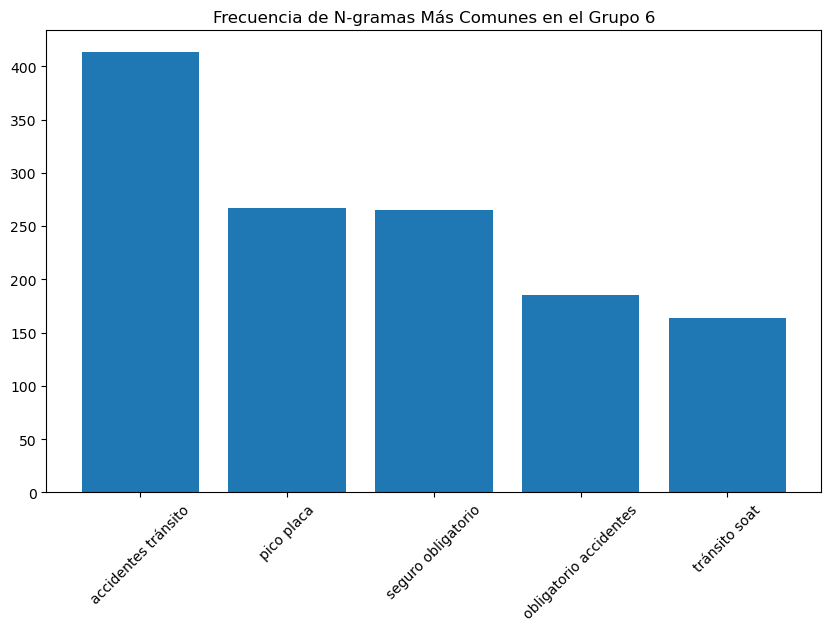

Grupo 7:
N-gramas más frecuentes: [(('reforma', 'salud'), 132), (('comisión', 'séptima'), 58), (('pacto', 'histórico'), 39), (('centro', 'democrático'), 31), (('ponencia', 'archivo'), 30)]


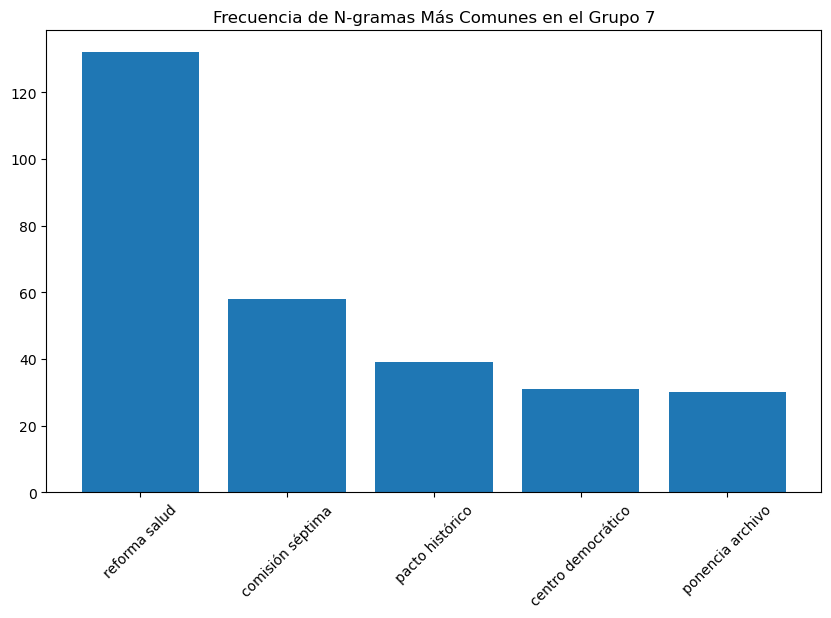

Grupo 8:
N-gramas más frecuentes: [(('congreso', 'aprobó'), 22), (('técnico', 'mecánica'), 21), (('seguro', 'obligatorio'), 21), (('aprobó', 'último'), 21), (('último', 'debate'), 21)]


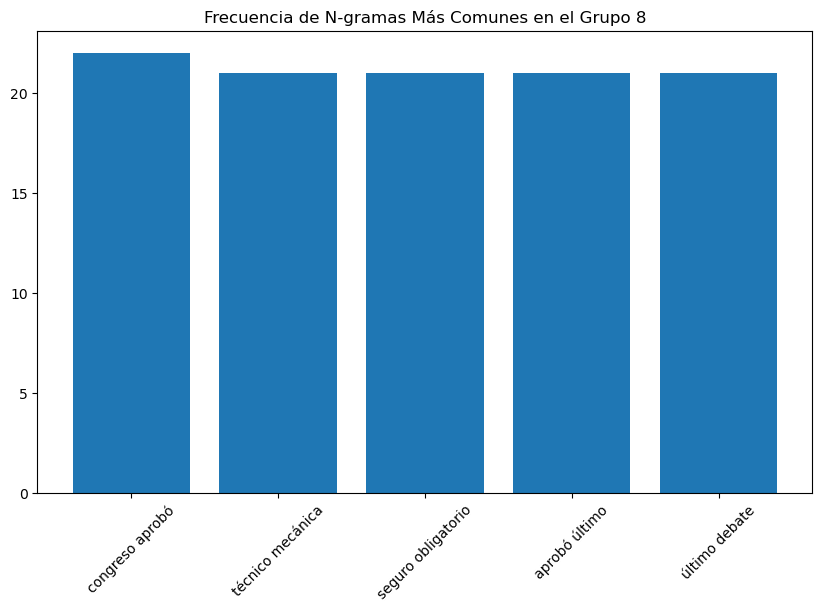

Grupo 9:
N-gramas más frecuentes: [(('reforma', 'salud'), 61), (('corte', 'constitucional'), 43), (('barack', 'obama'), 25), (('proyecto', 'reforma'), 23), (('empodera', 'conocimiento'), 22)]


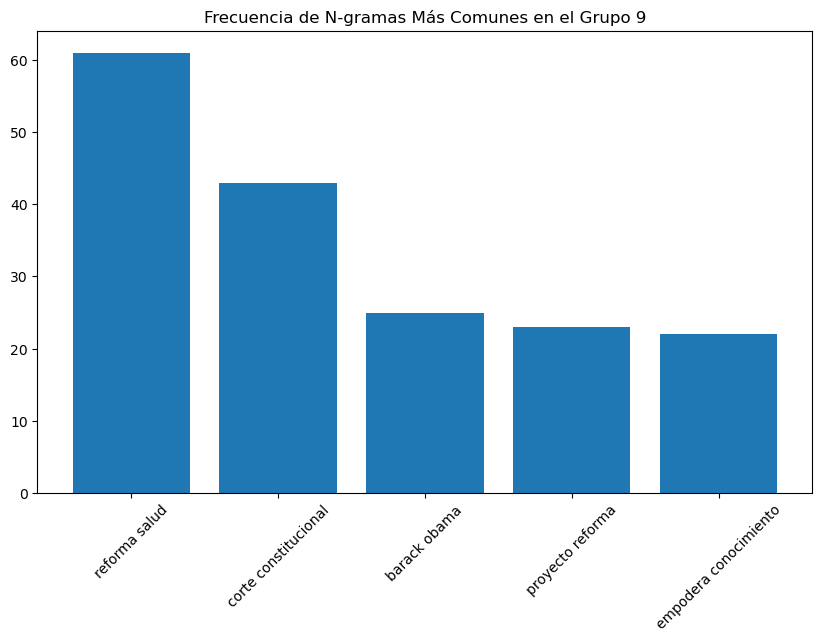

Grupo 10:
N-gramas más frecuentes: [(('reforma', 'salud'), 1327), (('sistema', 'salud'), 925), (('atención', 'primaria'), 350), (('gustavo', 'petro'), 274), (('servicios', 'salud'), 269)]


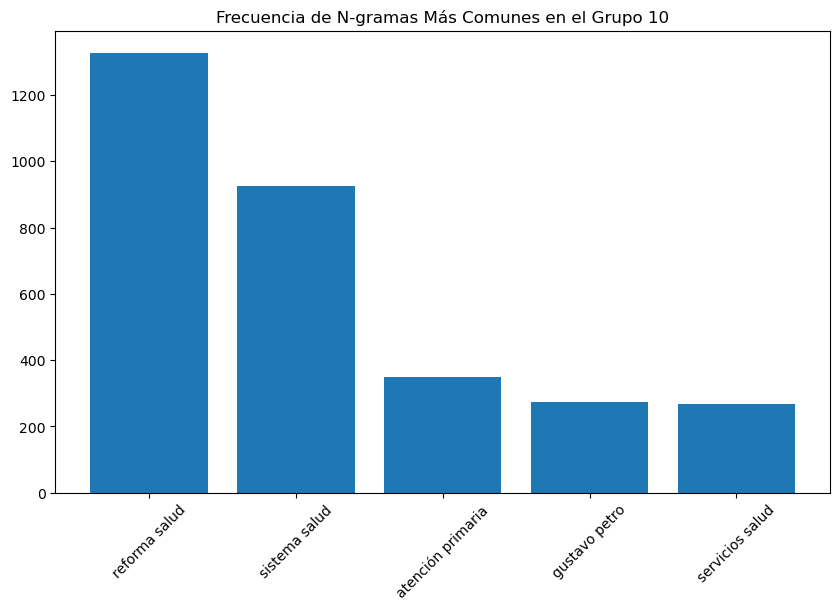

Grupo 11:
N-gramas más frecuentes: [(('giro', 'directo'), 24), (('reforma', 'salud'), 18), (('millones', 'peso'), 16), (('reforma', 'tributaria'), 15), (('presupuestos', 'máximos'), 13)]


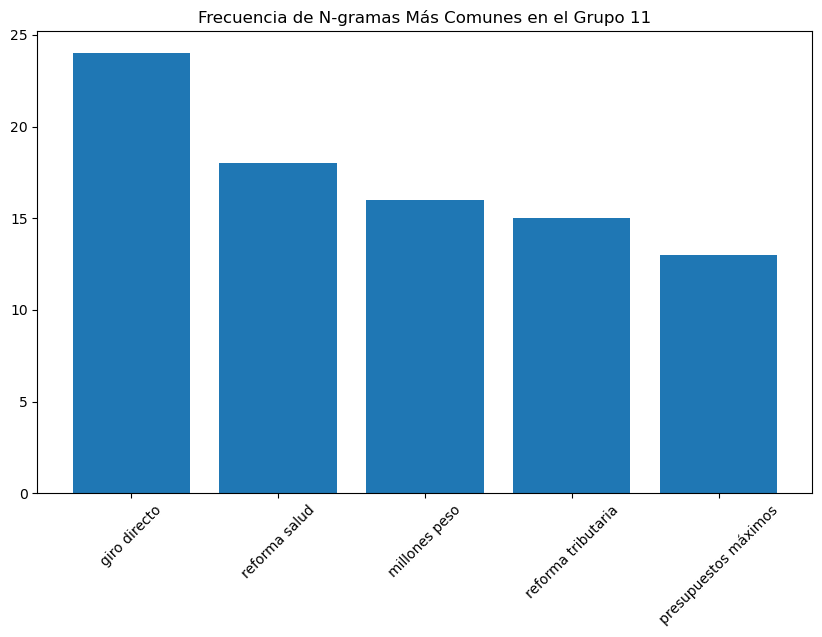

Grupo 12:
N-gramas más frecuentes: [(('millones', 'peso'), 44), (('accidentes', 'tránsito'), 40), (('persona', 'muerta'), 22), (('aparatoso', 'siniestro'), 21), (('siniestro', 'vial'), 21)]


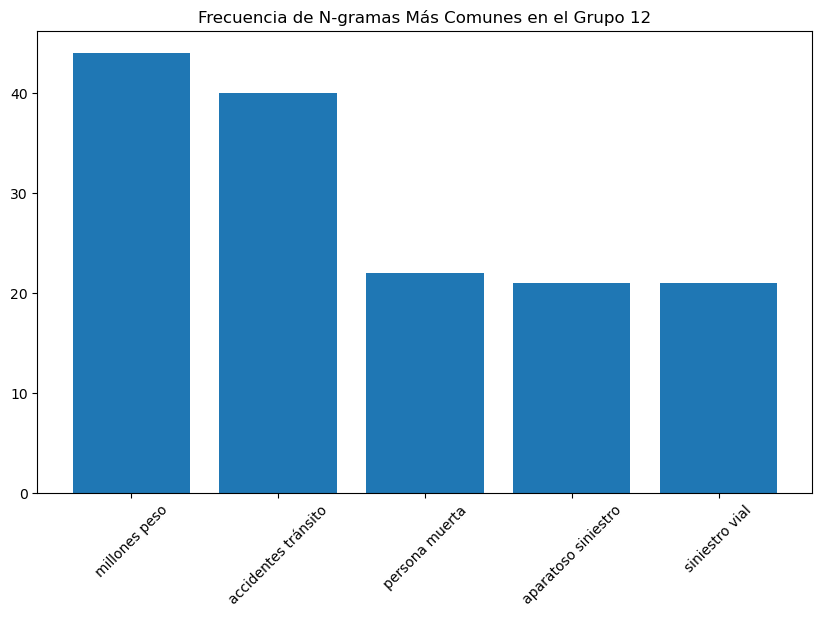

Grupo 13:
N-gramas más frecuentes: [(('reforma', 'salud'), 134), (('gustavo', 'petro'), 75), (('presidente', 'gustavo'), 59), (('favor', 'formar'), 57), (('formar', 'quorum'), 56)]


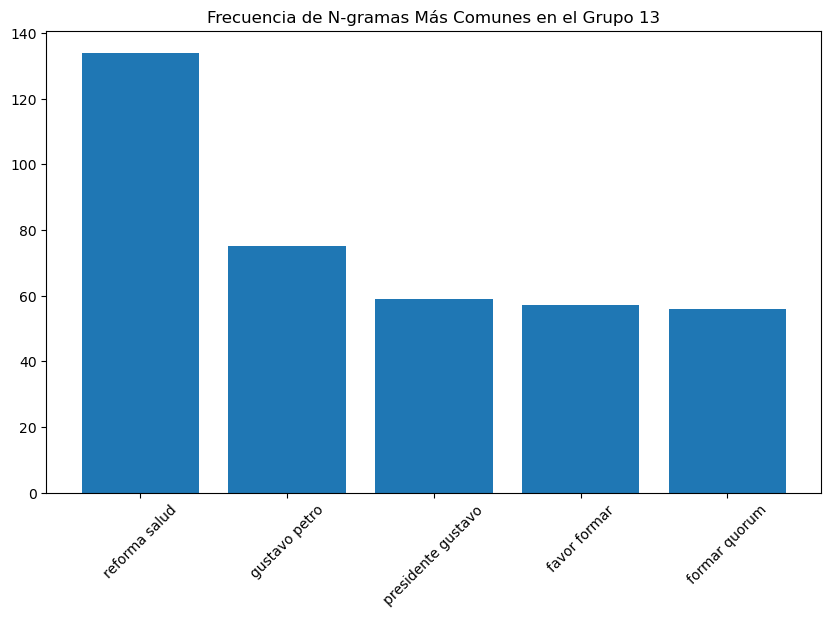

Grupo 14:
N-gramas más frecuentes: [(('puente', 'pinzón'), 23), (('reforma', 'arancelaria'), 19), (('millones', 'peso'), 17), (('américa', 'latina'), 16), (('soatá', 'boavita'), 16)]


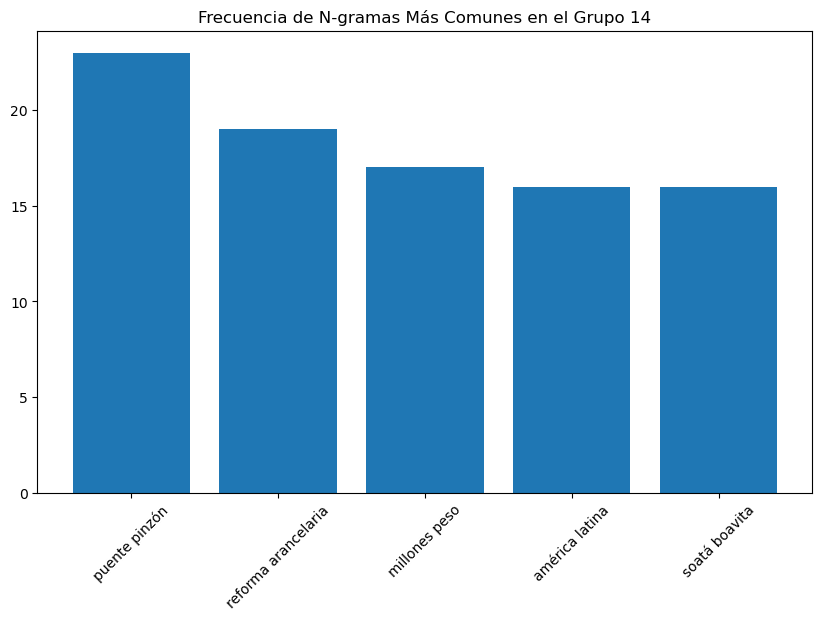

Grupo 15:
N-gramas más frecuentes: [(('millones', 'peso'), 469), (('ministerio', 'protección'), 232), (('protección', 'social'), 229), (('plan', 'obligatorio'), 191), (('obligatorio', 'salud'), 185)]


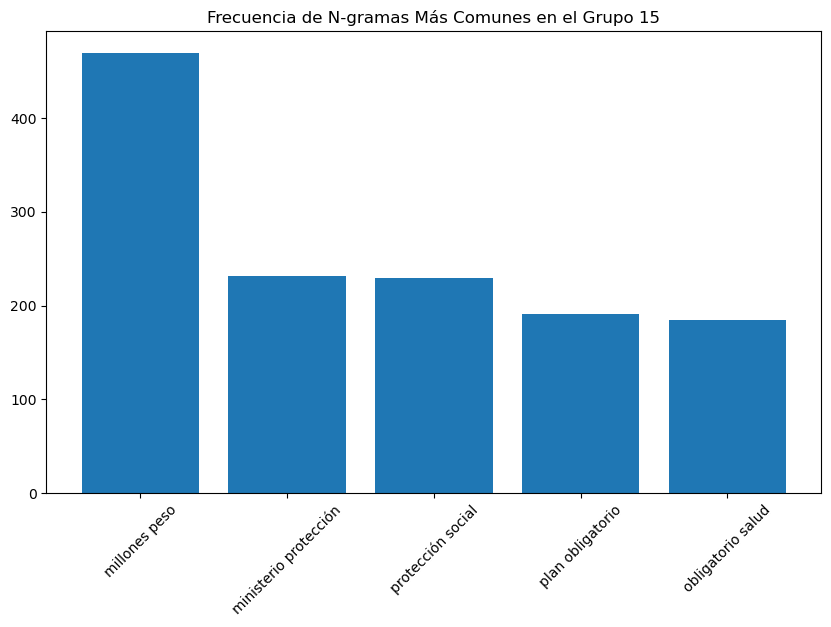

Grupo 16:
N-gramas más frecuentes: [(('empodera', 'conocimiento'), 48), (('reforma', 'tributaria'), 23), (('reforma', 'agraria'), 16), (('celebración', 'años'), 13), (('salud', 'empodera'), 12)]


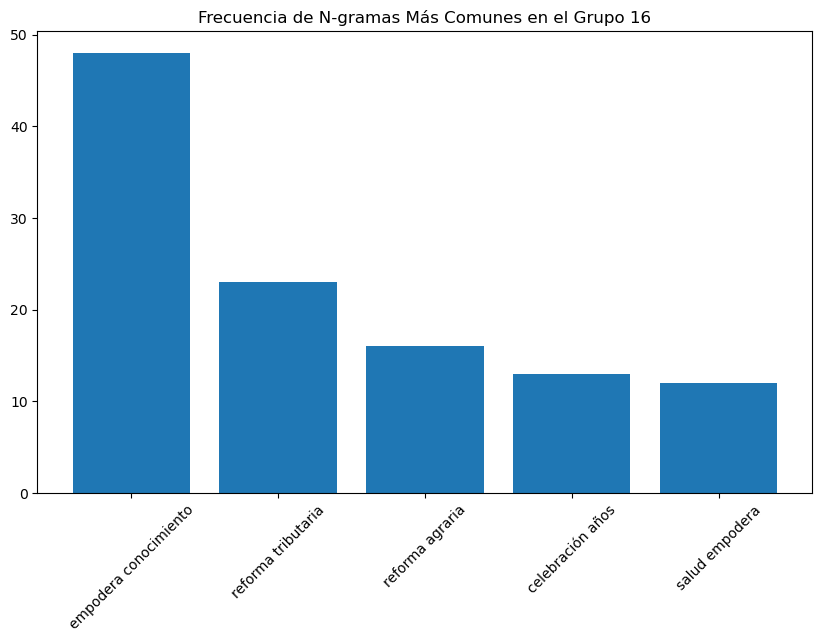

Grupo 17:
N-gramas más frecuentes: [(('sarcopenia', 'síntomas'), 144), (('síntomas', 'afección'), 144), (('afección', 'puede'), 144), (('puede', 'debilitar'), 144), (('debilitar', 'músculos'), 144)]


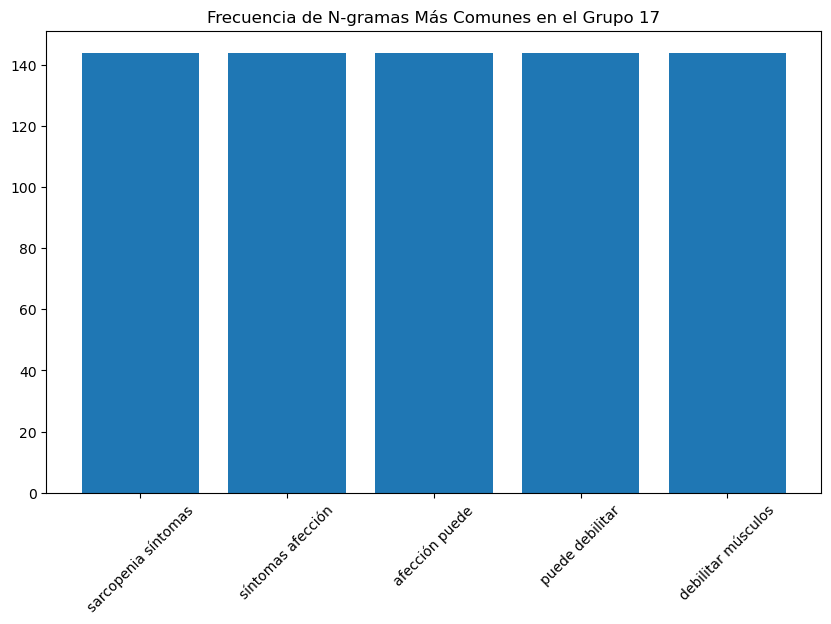

Grupo 18:
N-gramas más frecuentes: [(('reforma', 'tributaria'), 12), (('proyecto', 'reforma'), 7), (('comisiones', 'terceras'), 6), (('terceras', 'senado'), 6), (('sector', 'agropecuario'), 5)]


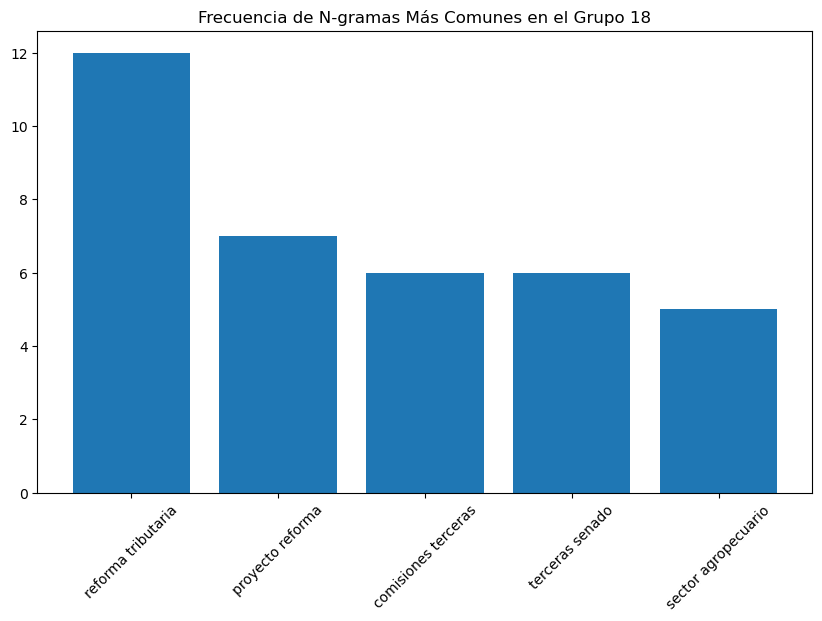

Grupo 19:
N-gramas más frecuentes: [(('seguro', 'obligatorio'), 110), (('accidentes', 'tránsito'), 109), (('tránsito', 'soat'), 86), (('obligatorio', 'accidentes'), 77), (('menos', 'años'), 32)]


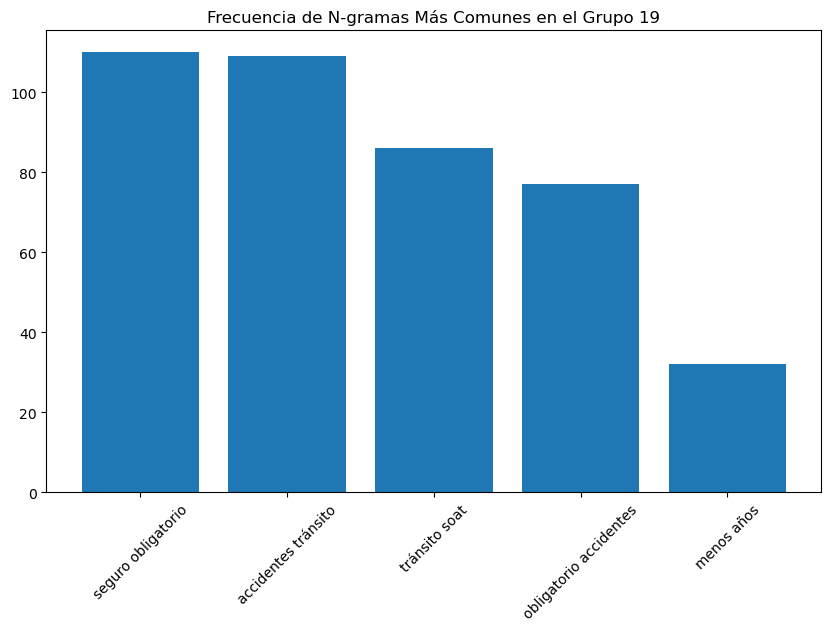

In [23]:

def plot_word_frequencies(words, frequencies, title):
    """Helper function to plot word frequencies."""
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


def extract_and_plot_frequent_ngrams(grouped_documents, preprocessed_texts, n=2):
    """Extract and plot the most frequent n-grams for each topic group."""
    for topic, documents in grouped_documents.items():
        print(f"Grupo {topic}:")
        group_texts = [preprocessed_texts[doc_id] for doc_id in documents]
        all_ngrams = [tuple(text[i:i+n]) for text in group_texts for i in range(len(text)-n+1)]
        ngram_freq = Counter(all_ngrams)
        most_common_ngrams = ngram_freq.most_common(5)  # Obtener los 5 n-gramas más frecuentes
        print("N-gramas más frecuentes:", most_common_ngrams)

        # Graficar la frecuencia de los n-gramas más comunes
        ngrams, frequencies = zip(*most_common_ngrams)
        ngram_words = [' '.join(ngram) for ngram in ngrams]
        plot_word_frequencies(ngram_words, frequencies, f"Frecuencia de N-gramas Más Comunes en el Grupo {topic}")

# Uso de las funciones con tu modelo LDA entrenado
extract_and_plot_frequent_ngrams(grouped_documents, preprocessed_texts, n=2)

principales de cada tema y combinarlas en una sola lista. Luego, puedes generar una visualización de nube de palabras a partir de esta lista combinada de palabras. Aquí te muestro cómo puedes hacerlo:

En este código:

Iteramos sobre cada tema para extraer las palabras principales usando el método show_topics().
Luego combinamos todas las palabras principales en una sola lista.
Después de eso, generamos una nube de palabras usando el módulo WordCloud de la biblioteca wordcloud.
Finalmente, mostramos la nube de palabras usando matplotlib.
Esta nube de palabras te proporcionará una representación visual general de las palabras más frecuentes en todos los temas, ayudándote a interpretar los temas o conceptos generales presentes en tu colección de documentos. Ajusta los parámetros de la nube de palabras (como el ancho, la altura y el color de fondo) según sea necesario para personalizar la visualización de acuerdo a tus preferencias.

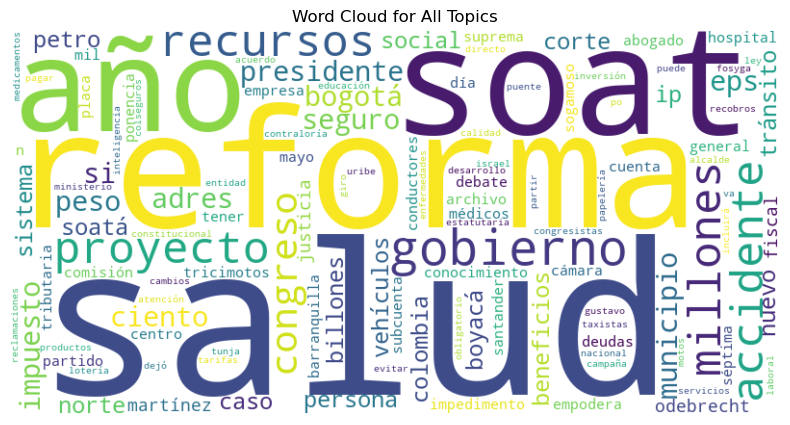

In [24]:
from gensim import models

# Assuming 'lda_model' is your trained LDA model

# Get the topics and their top words
topics = lda_model.show_topics(num_topics=-1, num_words=10, formatted=False)

# Extract top words from all topics
all_words = [word for topic_words in [topic[1] for topic in topics] for word, _ in topic_words]

# Combine top words into a single string (optional)
all_words_str = ' '.join(all_words)

# Generate word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for All Topics')
plt.axis('off')
plt.show()


In [26]:
def get_topic_probabilities(lda_model, dictionary, text):
    """Given a text, return the probabilities of belonging to each LDA topic."""
    # Preprocess the text
    preprocessed_text = preprocess_text(text)
    
    # Convert the text to the Bag of Words (BoW) format
    bow = dictionary.doc2bow(preprocessed_text)
    
    # Get the topic distribution for the text
    topic_distribution = lda_model.get_document_topics(bow)
    
    # Create a dictionary with topic probabilities
    topic_probabilities = {topic_id: prob for topic_id, prob in topic_distribution}
    
    return topic_probabilities

# Uso del método con un texto de ejemplo
example_text = """
El gobierno izquierdista de Gustavo Petro en Colombia vive una de sus semanas más convulsas. Según señalan varios analistas políticos y medios nacionales, este miércoles sufrió "su mayor derrota política" desde que está en la presidencia.
La reforma de la salud, una de las mayores apuestas de su programa, fue archivada en el Congreso tras 14 meses de debate político y público.
La reforma contenía varios puntos destacados, pero ninguno causó tanta división como la propuesta de transformar el rol de las llamadas Entidades Promotoras de Salud (EPS), unas cuestionadas aseguradoras público-privadas que compiten entre sí y median entre el paciente y el servicio de salud.
Petro considera que estas entidades reciben recursos públicos que capturan para sí mismas y que no son necesarias", le dice a BBC Mundo Johnattan García Ruiz, investigador de sistemas de salud globales en la Universidad de Harvard en Estados Unidos.
"""
topic_probabilities = get_topic_probabilities(lda_model, dictionary, example_text)

print("Probabilidades de pertenencia a cada tópico:")
for topic_id, prob in topic_probabilities.items():
    print(f"Tópico {topic_id}: {prob:.4f}")


Probabilidades de pertenencia a cada tópico:
Tópico 1: 0.2056
Tópico 8: 0.0208
Tópico 10: 0.6147
Tópico 13: 0.1293
Tópico 19: 0.0196
